<a name="outline"></a>

## Outline

- [Task 1](#task-1): Regression
  - [1.1](#q11) Linear regression
  - [1.2](#q12) Ridge regression
  - [1.3](#q13) Relaxation of Lasso regression
- [Task 2](#task-2): Classification
  - [2.1](#q21) kNN classifier
  - [2.2](#q22) Random forest 
  - [2.3](#q23) Support vector machine (SVM) 
- [Task 3](#task-3): Mastery component 
  - [3.1](#q31) Logistic regression and bagging 
  - [3.2](#q32) Kernelised SVM classifier 

In [1712]:
import numpy as np
from numpy import random
import random
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import itertools

I built this notebook in order so some functions in some exercises may use other functions defined in the previous exercises.

<a name="task-1"></a>
# Task 1: Regression [^](#outline)



<a name="q11"></a>

## 1.1: Linear regression  [^](#outline) 



### 1.1.1
We upload the data from $\texttt{chemistry_samples.csv}$.

In [1206]:
df_chemistry_samples = pd.read_csv("chemistry_samples.csv") #reading from th csv file
df_chemistry_samples #showing the data

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,FV1,VFV,FV2,FV3,LC50
0,3.661280,0.658363,1.602232,1.994272,0.836488,3.153623,15.893033,-27.724370,0.059355,0.756698,5.506249
1,3.936362,1.154287,1.146997,0.904295,2.948308,5.141095,13.590177,-31.821521,-13.408855,1.161298,6.636791
2,0.964144,0.415485,1.481028,2.136585,0.043679,-1.156783,15.989419,-3.699312,2.561525,0.500115,1.563388
3,2.074617,1.417296,0.486216,0.000908,-0.066980,2.610960,7.962046,-16.374439,2.448975,1.481888,6.248432
4,1.448569,0.836892,1.951012,0.028318,-0.039121,1.851095,22.285266,-9.526361,2.870400,0.649234,3.676796
...,...,...,...,...,...,...,...,...,...,...,...
4106,2.762548,0.139194,1.630518,0.141917,0.360599,0.539647,18.861590,-21.369570,1.470872,0.277810,2.526064
4107,3.806224,0.546949,0.853502,0.045760,-0.045528,4.691096,11.109325,-26.873982,3.592650,0.649017,5.876928
4108,2.512367,0.324823,1.920923,0.125953,0.020476,0.599234,18.817749,-18.689915,3.200544,0.431711,2.691485
4109,2.597895,0.335068,1.608763,0.107764,-0.206002,-0.393034,18.070758,-20.050566,4.586632,0.222328,2.096450


Supposing that the data is already clean we can proceed looking for a linear regression model. We are looking for $\boldsymbol \beta$ such that we can built a model $y = \boldsymbol X\boldsymbol\beta + \epsilon$, where $\boldsymbol X\in\mathbb{R}^{NxD} $ represents the inputs ($N$ is the number of rows in the dataset and $D=10$ is the number of features) and $y\in\mathbb{R}^N$ the noisy observations (corresponding to $\texttt{LC50}$). The parameter vector $\boldsymbol\beta\in\mathbb{R}^D$ is used to parametrize the function. It is important to recall that the parameter vector $\boldsymbol \beta$ can be obtained solving a least-squares optimisation problem. In particular at the end we will have $\boldsymbol \beta = (\boldsymbol X^T \boldsymbol X)^{-1} \boldsymbol X^T y$

In [1207]:
#Obtaining the matrices and the arrays from the data set
X_1 = df_chemistry_samples.to_numpy()
y = X_1[:,10] # creating the array y with the observation (LC50)
N = len(y)
X = X_1[:,:10] #creating a matrix storing the input data
X_aug = np.hstack([1.0 * np.ones((len(y),1)), X]) #augmented training matrix

In [1208]:
def betaobtainer(X_aug, y):
    """This function is used to obtain the parameters beta0, beta1, ...
    Inputs:
    
    X_aug: numpy matrix with the input data
    y: numpy array with the observed LC50
    
    Output:
    beta: array of parameters of the model"""
    
    beta = np.linalg.solve(X_aug.T@X_aug,X_aug.T@y)
    
    return beta

Now we print the parameters

In [1209]:
beta = betaobtainer(X_aug,y)
print('beta =' ,beta)

beta = [ 2.61638041e+00  4.47138333e-02  1.25871884e+00 -3.80092766e-02
  3.63073448e-01  4.66534885e-03  3.90510052e-01 -7.46028629e-02
 -3.57069460e-02 -1.52588258e-02 -1.80315940e-03]


Now we will compute the coefficient $R^2$ to determine how correct our model is. We remember that $R^2 = 1-\frac{\sum_i^N (y_i-(\tilde y_i))^2}{\sum_i^N (y_i-(\hat y ))^2}$, where $\hat y$ is the mean of the values of $y$, and $\tilde y$, is the vector of the predicted $\texttt{LC50}$ 

In [1210]:
#I define a general R_square calcolator functions

def R_square_calculator(X,y,beta):
    '''Calculates the coefficient Rsquare'''
    
    N = len(y)
    y_hat = np.mean(y) # computing the mean of the given y (vector of the values of 𝙻𝙲𝟻𝟶)
    # I will build an array from this in order to exploit numpy's functionalities
    y_hat_vectorized = y_hat*np.ones(N) #N is the dimension of y, y_hat_vectorized is a vector with all values equal to the mean
    y_tilde = X@beta #expected 𝙻𝙲𝟻𝟶, for given beta
    R_square = 1-np.linalg.norm(y-y_tilde)**2/np.linalg.norm(y-y_hat_vectorized)**2 #calculation of the coefficient R_square, using the formula 

    return R_square


In [1211]:
#We calculare R_square score for the data set 
R_square = R_square_calculator(X_aug,y,beta)
print(R_square)

0.8718259975718016


### 1.1.2
We upload from $\texttt{chemistry_test.csv}$.

In [1212]:
df_chemistry_test = pd.read_csv("chemistry_test.csv") #reading from th csv file
df_chemistry_test #showing 

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,FV1,VFV,FV2,FV3,LC50
0,1.617579,0.376167,1.224281,0.849464,1.101738,-0.448372,14.913614,-9.091450,-1.953849,0.328298,1.791786
1,4.278766,0.514788,1.259734,0.210436,0.819626,4.446118,12.904817,-37.986185,-2.804426,0.452758,6.125609
2,3.578652,0.221018,1.552583,1.007153,-0.013073,1.960720,17.393050,-27.188863,3.565159,0.341665,3.953270
3,3.021762,1.602774,1.044233,0.054776,2.060890,4.510903,12.777434,-22.710306,-7.966119,1.729511,6.995314
4,2.487163,0.799948,1.005727,0.094923,0.146542,2.298082,13.336721,-16.839870,2.607198,0.904353,5.253633
...,...,...,...,...,...,...,...,...,...,...,...
1023,2.484857,0.281358,1.763974,0.051496,-0.247010,0.555638,20.134148,-15.019887,3.323621,0.207371,2.693712
1024,1.732649,0.241483,1.332879,0.044737,-0.087352,0.478807,15.717319,-12.796126,2.762564,0.238815,2.690946
1025,3.478114,0.316327,1.196378,0.161062,0.021289,2.905319,13.947115,-29.829123,2.334150,0.157853,4.631151
1026,3.661736,0.388453,1.497032,0.018769,0.246858,3.307575,14.560784,-29.526837,1.566413,0.474895,3.846075


In [1364]:
#Obtaining the matrices and the arrays from the testing data set 
X_test_1 = df_chemistry_test.to_numpy()
y_test = X_test_1[:,10] # creating the array y with the observation (LC50)
N_test = len(y_test)
X_test = X_test_1[:,:10] #creating a matrix storing the input data
X_aug_test = np.hstack([np.ones((len(y_test),1)), X_test])

Now we can calculate the predicted values from the model starting from the data of our test dataset. We will calculate the coefficient $R^2$, to analyse if the model works well with this testing dataset. (Note that we are going to use the beta obtained from exercise 1.1)

In [1359]:
#We compute the R_square score for the testing data set
R_square_test = R_square_calculator(X_aug_test,y_test,beta)
print(R_square_test)

0.8642933369927281


We can compute the difference between the scores

In [1360]:
#difference
diff_R_square_score = np.abs(R_square-R_square_test) 
#relative difference in percentage
rel_diff_R_square_score = (diff_R_square_score/R_square)*100

print ('difference =',diff_R_square_score)
print ('rel difference in percentage =',round(rel_diff_R_square_score,2))

difference = 0.007532660579073425
rel difference in percentage = 0.86


Clearly the $R^2$ score for the testing data is smaller than the one for the training data-set, but this is understandable since the model was trained on this data. Then we can see that our model used for the testing data set has a 'comparable accuracy' to the 'accuracy' that this model provides for the training data set. In particular the $R^2$ score is only $0.86\%$ smaller for the training data set.
We can say that the model we build can be used for predictions since it's not to 'overfitted' to the training data.

However this analysis always depends from the requested precision. In fact what said before gives as a relationship between the two $R^2$ score, but in some real life cases we may need higher precision.

<a name="q12"></a>
## 1.2: Ridge regression [^](#outline)

### 1.2.1  
Ridge regretion can be computed with the introduction of a parameter $\lambda >0$, that we call 'penalty term', and then minimizing the loss function $L_{RIDGE}(\beta)=||y-X\beta||^2+\lambda ||\beta||^2$.
The parameter $\lambda$ has the duty to penalize high components of $\beta$.

First of all we code a function that computes $\beta$ for the ridge regression for a given dataset and a given parameter $\lambda$

In [1304]:
def ridge_estimate(X, y, lamb):
    """Implements the ridge regression, with given parameter lambda and returns the parameter beta_ridge (which we need to build the regression model)
    Inputs:
    
    X: NxD matrix containing the training inputs
    y: Nx1 array containing the training observations
    lamb:
     
    returns: beta_ridge"""
    
    N, D = X.shape
    I = np.identity(D)
    I[0,0] = 0
    beta_ridge = np.linalg.solve(X.T@X+lamb*I,X.T@y) 
    return beta_ridge

In this point we will use 5-fold cross-validation in order to look for the hyper-parameter of the model. This approach consists in the division of the dataset in 5 sub-sets. Fixed one of this sub-sets, say $S_t$, we call it 'validation set', and the remaining 4 sub-sets are the training set. Now we build a model from the training set and use it to predict over the set $S_t$. We compute the errors (measuring them with $MSE_t = \frac{1}{N}\sum_{i\in S_t}[f(x^{(i)})-y^{(i)}]^2$, where$f(x^{(i)})$ is the prediction we get). We repeat this process for all the 5 possible sub-sets (choosing each time one of them as validation set and the other ones as training set) and compute the average MSE.

We can build the average MSE dependant from $\lambda$ and use it to determine a good parameter $\lambda$


First of all we divide the indices in 5 sets, and write a function that computes the average MSE with given $\lambda$.

In [2038]:
#Obtaining the matrices and the arrays from the data set
X_1 = df_chemistry_samples.to_numpy()
y = X_1[:,10] # creating the array y with the observation (LC50)
N = len(y)
X = X_1[:,:10] #creating a matrix storing the input data
X_aug = np.hstack([np.ones((len(y),1)), X]) #augmented training matrix



X_aug_ridge = 1.0*X_aug
y_ridge = 1.0*y

# Now we divide the indices in 5 sets
folds_indexes = np.split(np.arange(len(y)-1), 5)

We define a function to calculate the MSE for a given $\beta$ and a function which implements cross validation and computes the average MSE over all the 5 validation-sets MSEs

In [1306]:
def MSEcalculator(X_val,y_val,beta):
    """Calculates the MSE"""
    N = len(y_val)
    values = []
    for i in range(N):
        calc = (y_val[i]-(X_val@beta)[i])**2
        values.append(calc)
    MSE = sum(values)/N
    return MSE


        

def cross_validation_score(X, y, folds, lamb):
   #Calculates the average MSE computing cross validation
    #Inputs: 

    #X: matrix 
    #y: vector
    #folds: folds with the indices
    #lamb: given parameter
    
    #returns: MSE

  scores = []
  for i in range(5):  #part of the code for this loop is taken from the functions provided in the weekly coding tasks of this module
    
    val_indexes = folds[i]
    train_indexes = list(set(range(y.shape[0]-1)) - set(val_indexes))
    
    #defining the training X and y
    X_train_i = X[train_indexes, :]
    y_train_i = y[train_indexes]

    #defining the validation X and y
    X_val_i = X[val_indexes, :] 
    y_val_i = y[val_indexes]
    
    beta_i = ridge_estimate(X_train_i,y_train_i,lamb=lamb) #calculating beta (with the ridge regression) for each one of the 5 training sets
    
    scores_i = MSEcalculator(X_val_i,y_val_i,beta_i) #calculating MSE 
    scores.append(scores_i)

  # Computing the average MSE
  return np.mean(scores)

Now we plot the behaviour of the average MSE for evolving parameter $\lambda$

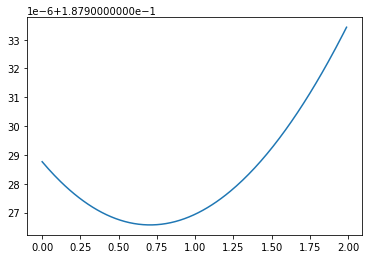

In [1307]:
#plotting average MSE vs lambda
l1 = [] #to store the values of the average MSE
m1 = [] #to store the values of the parameter lambda 
for i in range(0,200):
    lambda_val = 0.01*i
    m1.append(lambda_val)
    l1.append(cross_validation_score(X_aug_ridge, y_ridge, folds_indexes, lambda_val)) #calculating MSE and appending it to l
plt.plot(m1,l1)


We can see that for increaing $\lambda$ the model gets worse and so for to small values of $\lambda$

We know compute the optimal $\lambda$ minimizing the average MSE

In [1308]:
def choose_best_lambda(X, y, folds_indexes, lambda_range):   #part of the code for this loop is taken from the functions provided in the weekly coding tasks of this module
    lambda_scores = np.zeros((len(lambda_range),))
  
    for i, lamb in enumerate(lambda_range):
        lambda_scores[i] = cross_validation_score(X, y, folds_indexes, lamb)
        print(f'lambda={lamb}: average MSE= {lambda_scores[i]:.7f}')

    best_lambda_index = np.argmin(lambda_scores)  #We choose the optimal lambda
    return lambda_range[best_lambda_index]



In [1309]:
lambda_scores = np.linspace(0.0001,1,200)

best_lambda = choose_best_lambda(X_aug_ridge, y_ridge, folds_indexes, lambda_scores)

print('best_lambda:', best_lambda)

lambda=0.0001: average MSE= 0.1879288
lambda=0.00512462311557789: average MSE= 0.1879287
lambda=0.01014924623115578: average MSE= 0.1879287
lambda=0.015173869346733669: average MSE= 0.1879287
lambda=0.02019849246231156: average MSE= 0.1879286
lambda=0.02522311557788945: average MSE= 0.1879286
lambda=0.03024773869346734: average MSE= 0.1879286
lambda=0.035272361809045236: average MSE= 0.1879286
lambda=0.04029698492462312: average MSE= 0.1879285
lambda=0.04532160804020101: average MSE= 0.1879285
lambda=0.0503462311557789: average MSE= 0.1879285
lambda=0.055370854271356795: average MSE= 0.1879284
lambda=0.06039547738693468: average MSE= 0.1879284
lambda=0.06542010050251257: average MSE= 0.1879284
lambda=0.07044472361809047: average MSE= 0.1879283
lambda=0.07546934673366835: average MSE= 0.1879283
lambda=0.08049396984924624: average MSE= 0.1879283
lambda=0.08551859296482413: average MSE= 0.1879283
lambda=0.09054321608040201: average MSE= 0.1879282
lambda=0.09556783919597991: average MSE= 0

lambda=0.8442366834170855: average MSE= 0.1879267
lambda=0.8492613065326634: average MSE= 0.1879267
lambda=0.8542859296482412: average MSE= 0.1879267
lambda=0.8593105527638192: average MSE= 0.1879267
lambda=0.864335175879397: average MSE= 0.1879267
lambda=0.869359798994975: average MSE= 0.1879267
lambda=0.8743844221105528: average MSE= 0.1879267
lambda=0.8794090452261307: average MSE= 0.1879267
lambda=0.8844336683417087: average MSE= 0.1879267
lambda=0.8894582914572865: average MSE= 0.1879267
lambda=0.8944829145728644: average MSE= 0.1879267
lambda=0.8995075376884423: average MSE= 0.1879267
lambda=0.9045321608040202: average MSE= 0.1879267
lambda=0.909556783919598: average MSE= 0.1879268
lambda=0.914581407035176: average MSE= 0.1879268
lambda=0.9196060301507538: average MSE= 0.1879268
lambda=0.9246306532663318: average MSE= 0.1879268
lambda=0.9296552763819096: average MSE= 0.1879268
lambda=0.9346798994974875: average MSE= 0.1879268
lambda=0.9397045226130654: average MSE= 0.1879268
lamb

In [1310]:
#average MSE for lambda=0.06
cross_validation_score(X_aug_ridge, y_ridge, folds_indexes, 0.7035472361809045)

0.18792657379824249

So our optimal optimal parameter is $\lambda = 0.7035472361809045$ and for this value our average MSE is equal to $0.18792657379824249$

Now we will analyse the bias and the variance. We know that $MSE = Variance+Bias^2$. In particular we will have for incrasing $\lambda$ greater bias and lower variance. So the aim of the research of the hyperparameter is to find the right compromise.

### 1.2.2
We now assume the parameter to be the optimal one, so $\lambda = 0.7035472361809045$. Then we compute $\beta$ for this parameter.

In [1313]:
#beta for ridge regression with optimal parameter lambda
beta_optimal_ridge = ridge_estimate(X_aug_ridge,y_ridge,lamb = 0.7035472361809045)
print('optimal beta =', beta_optimal_ridge)

optimal beta = [ 2.61820782  0.04433538  1.25232768 -0.03780222  0.36279709  0.00495263
  0.39065421 -0.0746366  -0.03570966 -0.01524782  0.00318129]


Now I can compute the parameter $R^2$ for the set $\texttt{chemistry_samples.csv}$

In [1314]:
R_square_ridge = R_square_calculator(X_aug,y,beta_optimal_ridge)
R_square_ridge
print(R_square_ridge)

0.8718250505208601


Now we can compute the parameter $R^2$ for the set of $\texttt{chemistry_test.csv}$

In [1315]:
R_square_ridge_test = R_square_calculator(X_aug_test,y_test,beta_optimal_ridge)
print(R_square_ridge_test)



0.8642792450696695


We can compute the 'relative' difference in percentage

In [1316]:
#difference training-test R_squares
diff_122_tt = R_square_ridge-R_square_ridge_test
diff_122_percent_rel_tt = diff_122_tt/R_square_ridge*100
print ('relative difference =', diff_122_percent_rel_tt)

relative difference = 0.8655183108907591


We can see that that like for the linear regression the $R^2$ score is better for the training set (since the model has been built on it), however the model can be generalised, as we can see from the fact that also for the test set we get a good score. In particular for the testing data set the $R^2$ score drops by $0.86\%$

Now we can see the difference between this model and the linear regression of the previous excercise. We compute the difference between the $R^2$ score for the testing data with the previous model, and the score we obtain using the ridge-regression model

In [1303]:
diff_122 = R_square_ridge_test-R_square_test
diff_122_percent_rel = diff_122/R_square_test*100
print ('relative difference', diff_122_percent_rel)

relative difference -0.0016304560564716544


We can see that Ridge Regression is slightly worse, but still the difference is not so 'heavy', so both approachs provide a good model for the problem

<a name="q13"></a>

## 1.3: Relaxation of Lasso Regression [^](#outline)




### 1.3.1
We are considering a smooth version of Lasso, which uses the Huber functions $L_c$. The cost function can be written as $L(\beta) = ||y-X\beta||^2+\lambda \sum_i^p L_c(\beta_i)$, where the $\lambda$ is the penalty hyper parameter and p the number of the predictors we have.

### 1.3.2
We import the data set and we shuffle, then we also define the folds indexes, that we will use for the 5-fold cross-validation

In [1343]:
import numpy as np

In [1344]:
df_chemistry_samples = pd.read_csv("chemistry_samples.csv") #reading from th csv file
#Obtaining the matrices and the arrays from the data set
X_1 = df_chemistry_samples.to_numpy()
y = X_1[:,10] # creating the array y with the observation (LC50)
N = len(y)
X = X_1[:,:10] #creating a matrix storing the input data
X_aug = np.hstack([np.ones((len(y),1)), X]) #augmented training matrix



#I also shuffle my data 
p_lasso = np.random.permutation(len(y))
X_aug_lasso = 1.0*X_aug
y_lasso = 1.0*y

# Now we divide the indices in 5 sets
folds_indexes = np.split(np.arange(len(y)-1), 5)

We define a function computing the huber function. We know that $L_c(\beta) = \begin{cases} 
      \frac{1}{2} \beta^2  & |\beta|\leq c \\
     c(|\beta|-\frac{1}{2}c) & otherwise
   \end{cases}
$. The function we implement works in particular for arrays (so each component will be $L_c(\beta_i)$. Note that in the cost function for Lasso we had the sum $\sum_i^p L_c(\beta_i)$, where each $\beta_i$ is a component of $\beta$. 
Now we can see that if we do the gradient we get $\nabla (\sum_i^p L_c(\beta_i))= \nabla (L_c(\beta_1)+L_c(\beta_2)+...+L_c(\beta_p)) = v $, where $v$ is a p-dimensional array where each component $i$ is $\frac{d L_c(\beta_i)}{d \beta_i} = \begin{cases} 
       \beta_i  & |\beta_i|\leq c \\
     c\frac{\beta_i}{|\beta_i|} & otherwise
   \end{cases}$. 
   
We define then a function $\texttt{grad_huber}$, which computes this gradient. 

In [1345]:
#Uber functions
def huber(beta, c=1e-6):
    
    p = len(beta)
    huber = np.zeros(p)
    for j in range(p): #runs over each component
        if np.abs(beta[j])<=c:     #for this condition we return 1/2*beta^2
             huber[j] = 0.5*beta[j]**2 
        else:
              huber[j] = c*(np.abs(beta[j])-0.5*c)  #Otherwise I return this
    return huber

#gradient of Huber

def grad_huber(beta, c=1e-6):
    #Given a beta p - dimensional array and c, this functions computes the gradient of 
    # the gradient of SUM from i to p of Lc(beta_i)
    p = len(beta)
    grad_huber = np.zeros(p)
    for j in range(p): #runs over each component
        if np.abs(beta[j])<=c:   #first case
            grad_huber[j] = beta[j]
        else:     #second possible case
            k = beta[j]
            l = np.abs(beta[j])
            grad_huber[j] = c*(k/l)
    return grad_huber #return the gradient

Now we see that $
\frac{\partial ||y-X\beta||^2}{\partial \beta}=2X^TX\beta-2X^Ty$, so we can compute $\nabla L_{lasso}(\beta) = 2X^TX\beta-2X^Ty +\lambda v$, with $v$ defined as above.

We can now implement a functions which runs the gradient descent. We give as a max number of iterations 10000 and stepsize $10^{-3}$, and return the beta obtained with the method.

In [1346]:
def minimize_ls_huber(X, y, lambd, n_iters=100000, step_size=1e-3):
    n, p = X.shape
    XX = X.T @ X /n
    Xy = X.T @ y /n
    
    # next line: initialise betas
    beta = np.array([ 2.59176109e+00,  5.24173069e-02,  1.25879616e+00, -4.75743650e-02,
         3.63434515e-01,  5.35322170e-03,  3.90598346e-01, -7.30193241e-02,
        -3.51297259e-02, -1.49767687e-02,  1.65132173e-03])  #we start from a point we already now being a good one, to get better results
    Loss = 0
    
    # gradient descent 
    for i in range(n_iters):
        grad = 2*XX@beta-2*Xy+lambd*grad_huber(beta,c=1e-6)
        # next line: gradient descent update
        beta = beta-step_size*grad
        Loss = np.linalg.norm(y-X@beta)**2+lambd*np.sum(huber(beta,c = 1e-6))
        #print(np.linalg.norm(grad))
        
    return beta

We compute the 5-cross validation for the Lasso-Huber with a function, which we will call $\texttt{cross_validation_score_lasso}$. (We proceed similarly as for the ridge-regression part

In [1348]:
def MSEcalculator_Lasso(X_val,y_val,beta):
    """Calculates the MSE"""
    N = len(y_val)
    values = []
    for i in range(N):
        calc = (y_val[i]-(X_val@beta)[i])**2
        values.append(calc)
    MSE = sum(values)/N
    return MSE
        

def cross_validation_score_lasso(X, y, folds, lambd):
   #Calculates the average MSE computing cross validation
    #Inputs: 

    #X: matrix 
    #y: vector
    #folds: folds with the indices
    #lamb: given parameter
    
    #returns: MSE

  scores = []
  for i in range(5):  #part of the code for this loop is taken from the functions provided in the weekly coding tasks of this module
    
    val_indexes = folds[i]
    train_indexes = list(set(range(y.shape[0]-1)) - set(val_indexes))
    
    #defining the training X and y
    X_train_i = X[train_indexes, :]
    y_train_i = y[train_indexes]

    #defining the validation X and y
    X_val_i = X[val_indexes, :] 
    y_val_i = y[val_indexes]
    
    beta_i = minimize_ls_huber(X_train_i, y_train_i, lambd, n_iters=10000, step_size=1e-3) #calculating beta for each one of the 5 training sets
    
    scores_i = np.linalg.norm(y_val_i-(X_val_i@beta_i))**2/len(y_val_i) #calculating MSE 
    scores.append(scores_i)

  # Computing the average MSE
  return sum(scores) / 5

Now we choose the best parameter $\lambda$ minimizing the average MSE

In [1350]:
def choose_best_lambda_lasso(X, y, folds_indexes, lambda_range):   #part of the code for this loop is taken from the functions provided in the weekly coding tasks of this module
    lambda_scores = np.zeros((len(lambda_range),))
  
    for i, lamb in enumerate(lambda_range):
        lambda_scores[i] = cross_validation_score_lasso(X, y, folds_indexes, lamb)
        print(f'lambda={lamb}: average MSE= {lambda_scores[i]:.16f}')

    best_lambda_index = np.argmin(lambda_scores)  #We choose the optimal lambda
    return lambda_range[best_lambda_index]

lambda_scores_lasso = np.linspace(0,2600,300)

best_lambda_lasso = choose_best_lambda_lasso(X_aug_lasso, y_lasso, folds_indexes, lambda_scores_lasso)

print('best_lambda:', best_lambda_lasso)

lambda=0.0: average MSE= 0.1875454918240246
lambda=8.695652173913043: average MSE= 0.1875454843660000
lambda=17.391304347826086: average MSE= 0.1875454756133821
lambda=26.08695652173913: average MSE= 0.1875454657024281
lambda=34.78260869565217: average MSE= 0.1875454547071871
lambda=43.47826086956522: average MSE= 0.1875454427464378
lambda=52.17391304347826: average MSE= 0.1875454298587919
lambda=60.8695652173913: average MSE= 0.1875454161538284
lambda=69.56521739130434: average MSE= 0.1875454016866974
lambda=78.26086956521739: average MSE= 0.1875453865051617
lambda=86.95652173913044: average MSE= 0.1875453706933509
lambda=95.65217391304347: average MSE= 0.1875453542828553
lambda=104.34782608695652: average MSE= 0.1875453372671916
lambda=113.04347826086956: average MSE= 0.1875453198089238
lambda=121.7391304347826: average MSE= 0.1875453018402916
lambda=130.43478260869566: average MSE= 0.1875452834327340
lambda=139.1304347826087: average MSE= 0.1875452646405085
lambda=147.82608695652172

lambda=1243.4782608695652: average MSE= 0.1875442277605922
lambda=1252.1739130434783: average MSE= 0.1875442321373713
lambda=1260.8695652173913: average MSE= 0.1875442366629232
lambda=1269.5652173913043: average MSE= 0.1875442413375257
lambda=1278.2608695652173: average MSE= 0.1875442461604207
lambda=1286.9565217391303: average MSE= 0.1875442511323027
lambda=1295.6521739130435: average MSE= 0.1875442562516430
lambda=1304.3478260869565: average MSE= 0.1875442615204090
lambda=1313.0434782608695: average MSE= 0.1875442669362117
lambda=1321.7391304347825: average MSE= 0.1875442725005752
lambda=1330.4347826086955: average MSE= 0.1875442782123914
lambda=1339.1304347826085: average MSE= 0.1875442840713931
lambda=1347.8260869565217: average MSE= 0.1875442900788736
lambda=1356.5217391304348: average MSE= 0.1875442962328776
lambda=1365.2173913043478: average MSE= 0.1875443025344085
lambda=1373.9130434782608: average MSE= 0.1875443089832491
lambda=1382.6086956521738: average MSE= 0.18754431557846

lambda=2469.565217391304: average MSE= 0.1875463666368886
lambda=2478.260869565217: average MSE= 0.1875463912546146
lambda=2486.9565217391305: average MSE= 0.1875464104532258
lambda=2495.6521739130435: average MSE= 0.1875464353303481
lambda=2504.3478260869565: average MSE= 0.1875464591508483
lambda=2513.0434782608695: average MSE= 0.1875464939193229
lambda=2521.7391304347825: average MSE= 0.1875465243045593
lambda=2530.4347826086955: average MSE= 0.1875465454248466
lambda=2539.1304347826085: average MSE= 0.1875465786676427
lambda=2547.8260869565215: average MSE= 0.1875466058646555
lambda=2556.5217391304345: average MSE= 0.1875466410896200
lambda=2565.2173913043475: average MSE= 0.1875466680037297
lambda=2573.9130434782605: average MSE= 0.1875467107096458
lambda=2582.608695652174: average MSE= 0.1875467443973535
lambda=2591.304347826087: average MSE= 0.1875467692601903
lambda=2600.0: average MSE= 0.1875467993509395
best_lambda: 1000.0


Our best $\lambda$ is $1000$. We con compute the $\beta$ for this hyper parameter

In [1365]:
beta_lasso = minimize_ls_huber(X_aug_lasso,y_lasso,1000,n_iters=10000, step_size=1e-3)
beta_lasso

array([ 2.59416468e+00,  4.62529464e-02,  1.25796495e+00, -3.89868993e-02,
        3.62562016e-01,  3.80725816e-03,  3.91464648e-01, -7.35374758e-02,
       -3.57221479e-02, -1.52400109e-02,  7.58410204e-07])

Let's also plot the average MSE depending on the parameter $\lambda$ to see what is happening. 

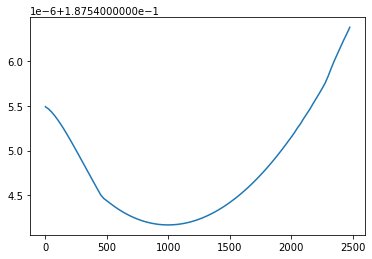

In [1351]:
#plotting average MSE vs lambda
l_lasso1 = [] #to store the values of the average MSE
m_lasso1 = [] #to store the values of the parameter lambda 
for i in range(0,100):
    lambda_val = 25*i
    m_lasso1.append(lambda_val)
    l_lasso1.append(cross_validation_score_lasso(X_aug_lasso, y_lasso, folds_indexes, lambda_val)) #calculating MSE and appending it to l
plt.plot(m_lasso1,l_lasso1)

We know can calculate the $R^2$ score of the Lasso-Huber model for the training data-set (we mean  in-sample).

In [1366]:
R_square_lasso = R_square_calculator(X_aug_lasso,y_lasso,beta_lasso)
print(R_square_lasso)

0.8718162628869924


We know can calculate the $R^2$ score of the Lasso-Huber model for the testing data-set (we mean  out-sample).

In [1367]:
R_square_lasso_test = R_square_calculator(X_aug_test,y_test,beta_lasso)
print(R_square_lasso_test)

0.8643183548530967


As before we can still see that the fist score is better but only slightly, so the method can be generalised, and used for previsions.

### 1.3.3


Lasso-Huber forces many parameters to have small values inducing a stronger sparcity then ridge. This can be seen for example in the last component of $\beta$. In fact for the ridge regression we have this component equal to $0.00318129$, while for the the lasso-huber is $7.58410204e-07$.

In [1410]:
print('beta for ridge =',beta_optimal_ridge)
print('beta for lasso =',beta_lasso)

beta for ridge = [ 2.61820782  0.04433538  1.25232768 -0.03780222  0.36279709  0.00495263
  0.39065421 -0.0746366  -0.03570966 -0.01524782  0.00318129]
beta for lasso = [ 2.59416468e+00  4.62529464e-02  1.25796495e+00 -3.89868993e-02
  3.62562016e-01  3.80725816e-03  3.91464648e-01 -7.35374758e-02
 -3.57221479e-02 -1.52400109e-02  7.58410204e-07]


So an 'increased level' of sparsity passing from Lasso-huber to Ridge can be observed

We can also print the difference between the norms of $\beta$ for the ridge and the lasso regression, to see that the norm for $\beta$ obtained with ridge is greater than the norm of  $\beta$ obtained with Lasso-Huber.

In [1414]:
print('difference =',np.linalg.norm(beta_optimal_ridge)-np.linalg.norm(beta_lasso))
print('relative difference in % =',(np.linalg.norm(beta_optimal_ridge)-np.linalg.norm(beta_lasso))*100/np.linalg.norm(beta_optimal_ridge))



difference = 0.01879303840265134
relative difference in % = 0.6364827759835024


<a name="task-2"></a>

# Task 2: Classification [^](#outline)

<a name="q21"></a>

## 2.1: kNN classifier [^](#outline)
### 2.1.1


First of all we import the data from $\texttt{tumour_samples.csv}$

In [118]:
df_tumour_samples = pd.read_csv("tumour_samples.csv") #reading from thr csv file
df_tumour_samples


,Unnamed: 0,n1_radius,n1_texture,n1_perimeter,n1_area,n1_smoothness,n1_compactness,n1_concavity,n1_concave_points,n1_symmetry,...,n3_texture,n3_perimeter,n3_area,n3_smoothness,n3_compactness,n3_concavity,n3_concave_points,n3_symmetry,n3_fractal_dimension,DIAGNOSIS
0,0,10.855170,15.248290,69.167041,359.534878,0.105488,0.080200,0.066410,0.034194,0.182796,...,18.984557,81.443134,466.879302,0.149080,0.200185,0.205695,0.111592,0.335999,0.093477,B
1,1,10.068958,15.532758,66.130635,330.040665,0.099813,0.109540,0.057583,0.023322,0.195650,...,22.840293,82.133171,473.367822,0.125478,0.330466,0.283304,0.088021,0.312882,0.096158,B
2,2,12.271409,18.100314,78.195610,421.537832,0.105147,0.095315,0.043317,0.031539,0.188801,...,26.365608,84.598334,620.586067,0.146766,0.118707,0.147900,0.050402,0.291805,0.069556,B
3,3,10.531733,18.452486,67.227069,340.063033,0.086041,0.049961,0.049709,0.011046,0.203093,...,24.385385,73.296855,429.675600,0.100060,0.143683,0.177225,0.028111,0.287749,0.073174,B
4,4,12.367686,14.399191,80.643814,460.849710,0.106410,0.101420,0.020806,0.021990,0.195326,...,19.614305,89.910502,472.323112,0.138135,0.276127,0.151098,0.074396,0.345258,0.095830,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,2561,14.383173,19.454910,100.495126,637.413375,0.076174,0.224136,0.305786,0.073760,0.168884,...,23.016513,108.867289,731.638144,0.079317,0.410666,0.674672,0.146962,0.241495,0.106978,B
2562,2562,10.018359,18.661516,61.848450,291.512307,0.083671,0.048121,0.028997,0.007389,0.164375,...,24.919767,67.920361,374.629250,0.129882,0.081497,0.109356,0.028243,0.252432,0.081462,B
2563,2563,11.168036,12.651203,67.102303,376.640056,0.096154,0.050181,0.017739,0.022895,0.183905,...,17.412221,73.221040,421.681446,0.135757,0.089036,0.070456,0.039851,0.295527,0.070584,B
2564,2564,11.719646,18.933783,78.556817,426.631397,0.113492,0.091756,0.070046,0.039025,0.203736,...,26.677691,86.572055,539.508865,0.132254,0.194688,0.179610,0.071053,0.330223,0.079510,B


We obtain matrices and arrays to work with from the dataset and standardise

In [119]:
#Obtaining the matrices and the arrays from the data set
Tumour_samples = df_tumour_samples.to_numpy()
y_tumour_samples = Tumour_samples[:,31] # creating the array with the classifications (B or M)
N_tumour_samples = len(y_tumour_samples)
X_tumour_samples = Tumour_samples[:,1:31] #creating a matrix storing the input data
X_tumour_samples.astype(float)

#We stamdardise
X_tumour_samples = (X_tumour_samples-np.mean(X_tumour_samples))/np.std(X_tumour_samples)

We define the euclidian dinstance. (Which could be defined also by hand, but I prefered to use numpy's built in function np.linalg.norm)

In [120]:
def euclidian_distance(p, q):
    return np.linalg.norm(p-q)

Now we will define the KNN function. This function takes a training set (both data and measured values), a parameter $k$ and return the predictions for we want to esaminate. More precisely the algorithm works as follows:
1. We take a 'point' x (in this case the point is a vector containing the 30 features we want to use in the prediction). We want to predict the diagnosis for this point.
2. We analyse the k-nearest 'point' and check their diagnosis
3. If analysing the diagnosis of this k elements we see that we have more 'B' than 'M', we 'predict' for x the diagnosis 'B' and vice-versa


This function is structured in quite an original way compared to the one provided in the weekly notebooks. I tried to use dictionaries and I coded in a different way to make the implementation faster

In [121]:
def k_neighbours(X_train, X_test, y_train, k, return_distance=False):
    """k-NN
    returns: the predictor array y_test"""
    number_neighbours = k
    dist = []
    neigh_ind = []
    strs = ['' for x in range((X_test).shape[0])]
    y_pred = np.array(strs)
    for j in range((X_test).shape[0]):
        x_test = X_test[j,:]
        D = {euclidian_distance(x_test,X_train[i,:]):y_train[i] for i in range(X_train.shape[0])} #{dictionary distance:diagnosis}
        listfuc = [D[key] for key in sorted(D)] #sorting and creating a list with the diagnosis of the sorted distance (I this way i have a list of diagnosis, in which each diagnosis is associated to a measurement more distant from the tester than the previous one)
        listfuc_k = listfuc[:k] #only the diagnosis of the nearest k elements
        my_dict = {i:listfuc_k.count(i) for i in listfuc_k} #counting the number of 'B' and 'M'
        
        #predicting analysing the number of 'B' and 'M' on the k nearest diagnosis
        if 'B' in my_dict:
            if my_dict['B'] > k//2:  #if more than half are 'B' assigns 'B', otherwise 'M'. 
                y_pred[j] = 'B'
            else:
                y_pred[j] = 'M'
        else:
            y_pred[j] = 'M'
    return y_pred

(Note that in tie situations we assign 'M'. This decision is made on a 'real life adaptation' idea. In fact in my opinion in this case is better to have false positive patients which can be proceed with further diagnosis, instead of false negatives patients who are not aware of their medical condition.)

To evaluate we will use the mean accuracy to see the precision of the predictions. We define a function to do that, which counts the number of the 'test points' that have been classified in a correct way and divides this number by the number of the elements we want to predict


In [122]:
def score(X_train, y_train, X_test, y_test, k):   #This function is strongly inspired by the weekly notebooks of this module
    y_pred = k_neighbours(X_train,X_test, y_train, k=k) 
    return float(sum(y_pred==y_test))/ float(len(y_test))

Let's define a function to perform the 5-fold cross-validation. Before we will divide the indexes in 5 sets.

In [123]:
# shuffling the rows in X and y
p = np.random.permutation(len(y_tumour_samples))
X_tumour_samples = X_tumour_samples[p]
y_tumour_samples = y_tumour_samples[p]


# Now we divide the indices in 5 sets
folds_indexes_tumour_samples = np.split(np.arange(len(y_tumour_samples)-1), 5)


The function is similar to the cross-validation functions we've done previusly in this coursework. We use the 'accuracy' to evaluate

In [124]:
def cross_validation_score_KNN(X_train, y_train, folds, k):
    #performs 5 cross validation and returns the average accuracy
    
  scores = []
  for i in range(len(folds)):
    val_indexes = folds[i]
    train_indexes = list(set(range(y_train.shape[0]-1)) - set(val_indexes))
    
    X_train_i = X_train[train_indexes, :]
    y_train_i = y_train[train_indexes]


    X_val_i = X_train[val_indexes, :] 
    y_val_i = y_train[val_indexes] 

    score_i = score(X_train_i, y_train_i, X_val_i, y_val_i, k=k) 
    scores.append(score_i)

  # Return the average score
  return sum(scores) / len(scores) 

We choose the best k

In [125]:
def choose_best_k(X_train, y_train, folds, k_range):   #This function is strongly inspired by the weekly notebooks of this module
  k_scores = np.zeros((len(k_range),))
  
  for i, k in enumerate(k_range):
    k_scores[i] = cross_validation_score_KNN(X_train, y_train, folds, k)
    print(f'CV_ACC@k={k}: {k_scores[i]:f}')

  best_k_index = np.argmax(k_scores)
  return k_range[best_k_index]



In [126]:
best_k = choose_best_k(X_tumour_samples, y_tumour_samples, folds_indexes_tumour_samples, np.arange(1, 15))

print('best_k:', best_k)

CV_ACC@k=1: 0.959454
CV_ACC@k=2: 0.957505
CV_ACC@k=3: 0.962573
CV_ACC@k=4: 0.963743
CV_ACC@k=5: 0.959844
CV_ACC@k=6: 0.961793
CV_ACC@k=7: 0.960234
CV_ACC@k=8: 0.961404
CV_ACC@k=9: 0.960234
CV_ACC@k=10: 0.960234
CV_ACC@k=11: 0.959454
CV_ACC@k=12: 0.960234
CV_ACC@k=13: 0.958674
CV_ACC@k=14: 0.958674
best_k: 4


###### The best $k$ we get is $k=4$

Now we plot the accuracy vs $k$ to see how it evolves for $k$ between 3 and 10. We expect the plot to reach a peak for $k=4$

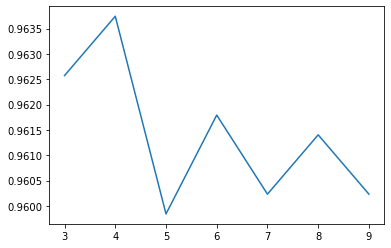

In [127]:
#plotting accuracy vs k
l_knn1 = [] #to store the values of the accuracy
m_knn1 = [] #to store the values of the parameter k
for i in range(3,10):
    k_val = i
    m_knn1.append(k_val)
    l_knn1.append(cross_validation_score_KNN(X_tumour_samples, y_tumour_samples, folds_indexes_tumour_samples, k_val)) #calculating accuracy and appending it to l_knn1
plt.plot(m_knn1,l_knn1)

### 2.1.2

I import the testing data set and standardising

In [128]:
import pandas as pd
df_tumour_test = pd.read_csv("tumour_test.csv") #reading from thr csv file
df_tumour_test

,Unnamed: 0,n1_radius,n1_texture,n1_perimeter,n1_area,n1_smoothness,n1_compactness,n1_concavity,n1_concave_points,n1_symmetry,...,n3_texture,n3_perimeter,n3_area,n3_smoothness,n3_compactness,n3_concavity,n3_concave_points,n3_symmetry,n3_fractal_dimension,DIAGNOSIS
0,0,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,...,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,M
1,1,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788,B
2,2,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,...,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710,B
3,3,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,...,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676,B
4,4,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,19.73,19.82,130.70,1206.0,0.10620,0.18490,0.24170,0.09740,0.1733,...,25.59,159.80,1933.0,0.17100,0.59550,0.84890,0.25070,0.2749,0.12970,M
196,196,23.29,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.16200,0.2200,...,32.68,177.00,1986.0,0.15360,0.41670,0.78920,0.27330,0.3198,0.08762,M
197,197,13.20,17.43,84.13,541.6,0.07215,0.04524,0.04336,0.01105,0.1487,...,27.82,88.28,602.0,0.11010,0.15080,0.22980,0.04970,0.2767,0.07198,B
198,198,13.64,15.60,87.38,575.3,0.09423,0.06630,0.04705,0.03731,0.1717,...,19.05,94.11,683.4,0.12780,0.12910,0.15330,0.09222,0.2530,0.06510,B


In [129]:
#Obtaining the matrices and the arrays from the data set
Tumour_test = df_tumour_test.to_numpy()
y_tumour_test = Tumour_test[:,31] # creating the array with the classifications (B or M)
N_tumour_test = len(y_tumour_test)
X_tumour_test = Tumour_test[:,1:31] #creating a matrix storing the input data
X_tumour_test.astype(float)

#I standardise

X_tumour_test = (X_tumour_test-np.mean(X_tumour_test))/np.std(X_tumour_test)

I obtain the list of the predictions to see what result we have

In [130]:
y_pred_testing_set = k_neighbours(X_tumour_samples, X_tumour_test, y_tumour_samples, k=4, return_distance=False)

In [131]:
print(y_pred_testing_set)

['B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M'
 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B'
 'B' 'B']


Now we compute the accuracy for the data set $\texttt{tumour_samples.csv}$



In [132]:
score(X_tumour_samples, y_tumour_samples, X_tumour_samples, y_tumour_samples, k = 4)

0.9746687451286048

Now we compute the accuracy for the data set $\texttt{tumour_test.csv}$



In [133]:
score(X_tumour_samples, y_tumour_samples, X_tumour_test, y_tumour_test, k = 4)

0.88

I can see that our predictions are better for the data set $\texttt{tumour_samples.csv}$ (we have $0.9746687451286048$, which is normal, because is the data set I used to build the model.
However the accuracy for data set $\texttt{tumour_test.csv}$ is $0.88$, which is good. We can say that our model can be quite generalised and used for prediction.

It is important to note however that depending on the circumstances this decrease of 'precision' on the testing data  could not be tolerated

<a name="q22"></a>

## 2.2: Random forest [^](#outline)

### 2.2.1
In this task we use a 5-cross fold validation to find the combination of optimal parameters (Max Depth of trees, Number of Trees) for the random forest method. To implement this method we use decision trees, that we use in order to classify the data. In particular we:
1) Perform bootstrapping on the given training data-set, so we create B sub-samples, from which we obtain a decision tree for each of these. Each tree is used to build a probability vector

2) Then averaging the probability vectors obtained from the different subsets we obtain a final probability vector.

3) Now we can proceed with our classification, classifing each sample in the class corresponding to the higher probability.

It is also important to say that we will proceed employing cross entropy minimization

The following functions are taken and adapted from the weekly jupyter notebooks provided as study material during this module

We are not going to use weighted samples so we take a vector of ones

In [1588]:
sample_weights_basic = np.ones(len(y_tumour_samples))

In [1691]:
def CE_index(y, sample_weights=None):    #slight modification of the weekly notebooks functions
  """  
  Calculate the cross entropy-index for labels.
  Arguments:
      y: array of the training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
  Returns:
      (float): the cross entropy-index for y.
  """

  # We count different labels in y，and then we store them in label_weights
  # initialize with zero for each distinct label.
  label_weights = {yi: 0 for yi in set(y)}  #we define a dictionary
  for yi, wi in zip(y, sample_weights):
      label_weights[yi] += wi

  total_weight = sum(label_weights.values())
  CE = 0 
  for label, weight in label_weights.items():
      CE -= (weight / total_weight)*np.log((weight / total_weight))

  return CE

In [1692]:
def split_samples(X, y, sample_weights, column, value, categorical):  #function taken from the weekly notebooks
  """
  Return the split of data whose column-th feature:
    1. equals value, in case `column` is categorical, or
    2. less than value, in case `column` is not categorical (i.e. numerical)

  Arguments:
      X: training features, of shape (N, D).
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
      column: the column of the feature for splitting.
      value: splitting threshold  the samples 
      categorical: boolean value indicating whether column is a categorical variable or numerical.
  Returns:
      tuple(np.array, np.array): tuple of subsets of X splitted based on column-th value.
      tuple(np.array, np.array): tuple of subsets of y splitted based on column-th value.
      tuple(np.array, np.array): tuple of subsets of sample weights based on column-th value.
  """ 

  if categorical:
    left_mask =(X[:, column] == value)
  else:
    left_mask = (X[:, column] < value)
  X_left, X_right = X[left_mask, :], X[~left_mask, :]
  y_left, y_right = y[left_mask], y[~left_mask]
  w_left, w_right  = sample_weights[left_mask], sample_weights[~left_mask]
  return (X_left, X_right), (y_left, y_right), (w_left, w_right)

In [2227]:
def CE_split_value(X, y, sample_weights, column, categorical):
  """
  Calculate the cross entropy -index based on `column` with the split that minimizes the cross entropy -index.
  Arguments:
      X: training features, of shape (N, D).
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
      column: the column of the feature for calculating. 0 <= column < D
      categorical: boolean value indicating whether column is a categorical variable or numerical.
  Returns:
      (float, float): the resulted cross entropy -index and the corresponding value used in splitting.
  """
  
  unique_vals = np.unique(X[:, column])

  assert len(unique_vals) > 1, f"There must be more than one distinct feature value. Given: {unique_vals}."

  CE_index_val, threshold = np.inf, None
  
  # split the values of i-th feature and calculate the cost 
  for value in unique_vals:
    (X_l, X_r), (y_l, y_r), (w_l, w_r) = split_samples(X, y, sample_weights, column, value, categorical) 

    # if one of the two sides is empty, skip this split.
    if len(y_l) == 0 or len(y_r) == 0:
      continue
    
    p_left = sum(w_l)/(sum(w_l) + sum(w_r))
    p_right = 1 - p_left
    new_cost = p_left * CE_index(y_l, w_l) + p_right * CE_index(y_r, w_r) 
    if new_cost < CE_index_val:
      CE_index_val, threshold = new_cost, value
    
  return CE_index_val, threshold

In [2228]:
CE_split_value(X_tumour_samples,y_tumour_samples,sample_weights_basic,column = 4, categorical = False) #just verifying that everything works

(0.41489691189061656, -0.279838916623836)

In [2229]:
def CE_split_rf(n_features, X, y, sample_weights, columns_dict):
  """
  Choose the best feature to split according to criterion.
  Args:
      n_features: number of sampled features.
      X: training features, of shape (N, D).
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
      columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
  Returns:
      (float, int, float): the minimized cross entropy-index, the best feature index and value used in splitting.
  """
  columns = np.random.choice(list(columns_dict.keys()), n_features, replace=False)
  columns_dict = {c: columns_dict[c] for c in columns}

  min_CE_index, split_column, split_val = np.inf, 0, 0
  for column, categorical in columns_dict.items():
    # skip column if samples are not seperable by that column.
    if len(np.unique(X[:, column])) < 2:
      continue

    # search for the best splitting value for the given column.
    CE_index, val = CE_split_value(X, y, sample_weights, column, categorical)    
    if CE_index < min_CE_index:
        min_CE_index, split_column, split_val = CE_index, column, val

  return min_CE_index, split_column, split_val

The columns we are considering are all numerical, so we will take a dictionary containing all 'false'



In [2230]:
dictionary_categorical = {index: False for index in range(X_tumour_samples.shape[1])}

In [2231]:
CE_split_rf(10, X_tumour_samples,y_tumour_samples,sample_weights_basic,dictionary_categorical)  #just verifying that everything works
#n_features, X, y, sample_weights, columns_dict

(0.18150069741187327, 23, 4.8793197669441595)

In [1698]:
def majority_vote(y, sample_weights):
  """
  Return the label which appears the most in y.
  Args:
      y: vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
  Returns:
      (int): the majority label
  """
  majority_label = {yi: 0 for yi in set(y)}

  for yi, wi in zip(y, sample_weights):
    majority_label[yi] += wi
  return max(majority_label, key=majority_label.get)

Building tree function

In [1699]:
def build_tree_rf(n_features, X, y, sample_weights, columns_dict, depth,  max_depth=10, min_samples_leaf=2):
  """Build the decision tree according to the data.
  Args:
      X: (np.array) training features, of shape (N, D).
      y: (np.array) vector of training labels, of shape (N,).
      sample_weights: weights for each samples, of shape (N,).
      columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
      feature_names (list): record the name of features in X in the original dataset.
      depth (int): current depth for this node.
  Returns:
      (dict): a dict denoting the decision tree (binary-tree). Each node has seven attributes:
        1. 'feature_name': The column name of the split.
        2. 'feature_index': The column index of the split.
        3. 'value': The value used for the split.
        4. 'categorical': indicator for categorical/numerical variables.
        5. 'majority_label': For leaf nodes, this stores the dominant label. Otherwise, it is None.
        6. 'left': The left sub-tree with the same structure.
        7. 'right' The right sub-tree with the same structure.
      Example:
          mytree = {
              'feature_name': 'petal length (cm)',
              'feature_index': 2,
              'value': 3.0,
              'categorical': False,
              'majority_label': None,
              'left': {
                  'feature_name': str,
                  'feature_index': int,
                  'value': float,
                  'categorical': bool,
                  'majority_label': None,
                  'left': {..etc.},
                  'right': {..etc.}
              }
              'right': {
                  'feature_name': str,
                  'feature_index': int,
                  'value': float,
                  'categorical': bool,
                  'majority_label': None,
                  'left': {..etc.},
                  'right': {..etc.}
              }
          }
  """
  # include a clause for the cases where (i) all lables are the same, (ii) depth exceed (iii) X is too small
  if len(np.unique(y)) == 1 or depth>=max_depth or len(X)<=min_samples_leaf: 
      return {'majority_label': majority_vote(y, sample_weights)}
  
  else:
    CE, split_index, split_val = CE_split_rf(n_features, X, y, sample_weights, columns_dict)
    
    # If CE is infinity, it means that samples are not seperable by the sampled features.
    if CE == np.inf:
      return {'majority_label': majority_vote(y, sample_weights)}
    categorical = columns_dict[split_index]
    (X_l, X_r), (y_l, y_r), (w_l, w_r) = split_samples(X, y, sample_weights, split_index, split_val, categorical) 
    return {
        'feature_index': split_index,
        'value': split_val,
        'categorical': categorical,
        'majority_label': None,
        'left': build_tree_rf(n_features, X_l, y_l, w_l, columns_dict, depth + 1, max_depth, min_samples_leaf),
        'right': build_tree_rf(n_features, X_r, y_r, w_r, columns_dict, depth + 1, max_depth, min_samples_leaf)
    }

Training Function

In [1700]:
def train_rf(B, max_depth, n_features, X, y,  columns_dict, sample_weights=None):
  """
  Build the decision tree according to the training data.
  Args:
      B: number of decision trees.
      max_depth: max depth allowed for the trees
      X: (pd.Dataframe) training features, of shape (N, D). Each X[i] is a training sample.
      y: (pd.Series) vector of training labels, of shape (N,). y[i] is the label for X[i], and each y[i] is
      an integer in the range 0 <= y[i] <= C. Here C = 1.
      columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
      sample_weights: weights for each samples, of shape (N,).
  """
  if sample_weights is None:
      # if the sample weights is not provided, we assume the samples have uniform weights
      sample_weights = np.ones(X.shape[0]) / X.shape[0]
  else:
      sample_weights = np.array(sample_weights) / np.sum(sample_weights)

  N = X.shape[0]
  training_indices = np.arange(N)
  trees = []

  for _ in range(B):
    sample = np.random.choice(training_indices, N, replace=True)
    X_sample = X[sample, :]
    y_sample = y[sample]
    w_sample = sample_weights[sample]
    tree = build_tree_rf(n_features, X_sample, y_sample, w_sample, columns_dict, depth=1,  max_depth=max_depth)
    trees.append(tree)

  return trees

Classification function

In [1701]:
def classify(tree, x):
  """
  Classify a single sample with the fitted decision tree.
  Args:
      x: ((pd.Dataframe) a single sample features, of shape (D,).
  Returns:
      (int): predicted testing sample label.
  """
  if tree['majority_label'] is not None: 
    return tree['majority_label']

  elif tree['categorical']:
    if x[tree['feature_index']] == tree['value']:
      return classify(tree['left'], x)
    else:
      return classify(tree['right'], x)

  else:
    if x[tree['feature_index']] < tree['value']:
      return classify(tree['left'], x)
    else:
      return classify(tree['right'], x)

Prediction function

In [1702]:
def predict_rf(rf, X):
  """
  Predict classification results for X.
  Args:
      rf: A trained random forest through train_rf function.
      X: (pd.Dataframe) testing sample features, of shape (N, D).
  Returns:
      (np.array): predicted testing sample labels, of shape (N,).
  """

  def aggregate(decisions):
    count = defaultdict(int)
    for decision in decisions:
      count[decision] += 1
    return max(count, key=count.get)

  if len(X.shape) == 1:
      return aggregate([classify(tree, X) for tree in rf])
  else:
      return np.array([aggregate([classify(tree, x) for tree in rf]) for x in X])

We re-upload the dataset

In [1703]:
#Training
Tumour_samples = df_tumour_samples.to_numpy()
y_tumour_samples = Tumour_samples[:,31] # creating the array with the classifications (B or M)
N_tumour_samples = len(y_tumour_samples)
X_tumour_samples = Tumour_samples[:,1:31] #creating a matrix storing the input data


#Training
Tumour_test = df_tumour_test.to_numpy()
y_tumour_test = Tumour_test[:,31] # creating the array with the classifications (B or M)
N_tumour_test = len(y_tumour_test)
X_tumour_test = Tumour_test[:,1:31] #creating a matrix storing the input data



array([[1.340e+01, 2.052e+01, 8.864e+01, ..., 2.051e-01, 3.585e-01,
        1.109e-01],
       [1.321e+01, 2.525e+01, 8.410e+01, ..., 6.005e-02, 2.444e-01,
        6.788e-02],
       [1.402e+01, 1.566e+01, 8.959e+01, ..., 8.216e-02, 2.136e-01,
        6.710e-02],
       ...,
       [1.320e+01, 1.743e+01, 8.413e+01, ..., 4.970e-02, 2.767e-01,
        7.198e-02],
       [1.364e+01, 1.560e+01, 8.738e+01, ..., 9.222e-02, 2.530e-01,
        6.510e-02],
       [1.499e+01, 2.520e+01, 9.554e+01, ..., 2.899e-02, 1.565e-01,
        5.504e-02]])

In [1704]:
n_features = X_tumour_samples.shape[1] // 3
B = 3
# fit the random forest with training data
rf = train_rf(B,25, n_features, X_tumour_samples, y_tumour_samples, dictionary_categorical)   #training just verifying that everything works

Accuracy function

In [1706]:
def rf_score(rf, X_test, y_test):
  y_pred = predict_rf(rf, X_test) 
  return np.mean(y_pred==y_test)

Cross validation

In [1759]:
def cross_validation_score_RF(X_train, y_train, folds, Number_of_trees, max_depth):
    #performs 5 cross validation and returns the average accuracy
  scores = []
  for i in range(len(folds)):
    val_indexes = folds[i]
    train_indexes = list(set(range(y_train.shape[0]-1)) - set(val_indexes))
    
    X_train_i = X_train[train_indexes, :]
    y_train_i = y_train[train_indexes]


    X_val_i = X_train[val_indexes, :] 
    y_val_i = y_train[val_indexes] 
    
    
    n_features = 10

    rf = train_rf(Number_of_trees, max_depth, n_features, X_train_i, y_train_i, dictionary_categorical , sample_weights=None) 
    scorerf = rf_score(rf,X_val_i,y_val_i)
    scores.append(scorerf)

  # Return the average score
  return np.mean(scores) 

Defining the hyperparameter combinations we will use, which will be: [(5, 1), (5, 3), (5, 5), (10, 1), (10, 3), (10, 5), (15, 1), (15, 3), (15, 5)], where the first value represent the max depth of the trees and the second the number of the trees


In [1782]:
list_of_max_depths = np.linspace(5,15,3)
print(list_of_max_depths)

list_of_number_of_trees = np.linspace(1,5,3)

list_of_hyperparameters = []
for i in itertools.product(list_of_max_depths,list_of_number_of_trees):
    list_of_hyperparameters.append(i)
    
print(list_of_hyperparameters)

[ 5. 10. 15.]
[(5.0, 1.0), (5.0, 3.0), (5.0, 5.0), (10.0, 1.0), (10.0, 3.0), (10.0, 5.0), (15.0, 1.0), (15.0, 3.0), (15.0, 5.0)]


In [1784]:
def choose_best_hp(X_train, y_train, folds, list_of_hyperparameters):   #This function is strongly inspired by the weekly notebooks of this module
  hyperparameter_scores = np.zeros((len(list_of_hyperparameters),))
  
  for i, hypcomb in enumerate(list_of_hyperparameters):

    hyperparameter_scores[i] = cross_validation_score_RF(X_train, y_train, folds, int(hypcomb[1]), int(hypcomb[0]))
    
    print(f'hyperparameters={hypcomb}: {hyperparameter_scores[i]:f}')

  best_hyperparameter_index = np.argmax(hyperparameter_scores)
  return list_of_hyperparameters[best_hyperparameter_index]



In [1785]:
best_parameters = choose_best_hp(X_tumour_samples, y_tumour_samples, folds_indexes_tumour_samples,list_of_hyperparameters)

print('best couple of parameters:', best_parameters)

hyperparameters=(5.0, 1.0): 0.967251
hyperparameters=(5.0, 3.0): 0.977778
hyperparameters=(5.0, 5.0): 0.977388
hyperparameters=(10.0, 1.0): 0.968811
hyperparameters=(10.0, 3.0): 0.979727
hyperparameters=(10.0, 5.0): 0.982846
hyperparameters=(15.0, 1.0): 0.969201
hyperparameters=(15.0, 3.0): 0.982456
hyperparameters=(15.0, 5.0): 0.985575
best couple of parameters: (15.0, 5.0)


hyperparameters=(5.0, 1.0): 0.967251
hyperparameters=(5.0, 3.0): 0.977778
hyperparameters=(5.0, 5.0): 0.977388
hyperparameters=(10.0, 1.0): 0.968811
hyperparameters=(10.0, 3.0): 0.979727
hyperparameters=(10.0, 5.0): 0.982846
hyperparameters=(15.0, 1.0): 0.969201
hyperparameters=(15.0, 3.0): 0.982456
hyperparameters=(15.0, 5.0): 0.985575
best couple of parameters: (15.0, 5.0)

We obtained that the couple with the greatest number of trees and the highest max depth is the best, this however is odd. This is why we will implement cross validation some other times to see what happens for greater numbers

In [1786]:
list_of_max_depths2 = np.linspace(25,25,1)
print(list_of_max_depths)

list_of_number_of_trees2 = np.linspace(3,3,1)

list_of_hyperparameters2 = []
for i in itertools.product(list_of_max_depths2,list_of_number_of_trees2):
    list_of_hyperparameters2.append(i)
    
print(list_of_hyperparameters2)

[ 5. 10. 15.]
[(25.0, 3.0)]


In [1787]:
best_parameters2 = choose_best_hp(X_tumour_samples, y_tumour_samples, folds_indexes_tumour_samples,list_of_hyperparameters2)

print('best couple of parameters:', best_parameters2)

hyperparameters=(25.0, 3.0): 0.981287
best couple of parameters: (25.0, 3.0)


We can already see that $(25,3)$ is not better than $(15,3)$, but we can investigate further

In [1789]:
list_of_max_depths3 = np.linspace(25,30,2)
print(list_of_max_depths)

list_of_number_of_trees3 = np.linspace(6,10,2)

list_of_hyperparameters3 = []
for i in itertools.product(list_of_max_depths3,list_of_number_of_trees2):
    list_of_hyperparameters3.append(i)
    
print(list_of_hyperparameters3)

[ 5. 10. 15.]
[(25.0, 3.0), (30.0, 3.0)]


In [1790]:
best_parameters3 = choose_best_hp(X_tumour_samples, y_tumour_samples, folds_indexes_tumour_samples,list_of_hyperparameters3)

print('best couple of parameters:', best_parameters2)

hyperparameters=(25.0, 3.0): 0.980507
hyperparameters=(30.0, 3.0): 0.979337
best couple of parameters: (25.0, 3.0)


Is it clear that (25,3) and (30,3), despite having a greater possible depth are not better couples than some of the already explored ones.
We could investigate further but the computational cost of this algorithm makes it slow and so it requires to time. This is the reason we will stick with the best combination of hyperparameters we have obtained until now, which is (15,5)

### 2.2.2

The best couple we got is (Max Depth,Number of Trees) = (15,5). We train our model with these 2 parameters. We will give as number of features the value 10.

In [1807]:
rf_optimal = train_rf(5,15,10, X_tumour_samples, y_tumour_samples, dictionary_categorical)

In [1808]:
rf_score(rf_optimal,X_tumour_samples,y_tumour_samples)

0.9988308651597818

In [1809]:
rf_score(rf_optimal,X_tumour_test,y_tumour_test)

0.975

We can see that the accuracy is $0.9988308651597818$ on the training set and $0.975$ on the testing set, so the model provides a really good result.

We can do a better analysis employing confusion matrices. To do so we will need to slightly modify the accuracy function. (We will take 'B' as negative and 'M' as positive)

In [1837]:
def rf_score_CM(rf, X_test, y_test):
  y_pred = predict_rf(rf, X_test)
  N = len(y_test)
  TP = 0 #True positives
  TN = 0 #True negatives
  FP = 0 #False positives
  FN = 0 #False negatives
  for j in range(N):
    if y_pred[j] == y_test[j] and y_pred[j]== 'B': 
            TN+=1
    elif y_pred[j] == y_test[j] and y_pred[j] == 'M':
            TP+=1
    elif y_pred[j] != y_test[j] and y_pred[j] == 'M':
            FP+=1
    elif y_pred[j] != y_test[j] and y_pred[j] == 'B':
            FN+=1
            
  return np.mean(y_pred==y_test),TP,TN,FP,FN

We calculate true positives, true negatives, false positives, false negatives

In [1838]:
rf_accuracy_samples, TP_1,TN_1,FP_1,FN_1 = rf_score_CM(rf, X_tumour_samples, y_tumour_samples)
print(rf_accuracy_samples, TP_1,TN_1,FP_1,FN_1)

0.9980514419329696 420 2141 1 4


In [1839]:
rf_accuracy_test, TP_2,TN_2,FP_2,FN_2 = rf_score_CM(rf, X_tumour_test, y_tumour_test)
print(rf_accuracy_test, TP_2,TN_2,FP_2,FN_2)

0.98 69 127 0 4


So on the training samples we have 420 true positive, 2141 true negatives, 1 false positives and 4 false negatives

On the testing data set we have 69 true positive, 127 true negatives, 0 false positives and 4 false negatives

We want to build the F-Score, so we need the $precision=\frac{TP}{TP+FP}$, the $recall = \frac{TP}{TP+FN}$

In [1851]:
#precision for the the training set 
precision1 = TP_1/(TP_1+FP_1)
#precision for the the test set 
precision2 = TP_2/(TP_2+FP_2)
#recall for the the training set 
recall1 = TP_1/(TP_1+FN_1)
#recall for the the testing set 
recall2 = TP_2/(TP_2+FN_2)
print('precision for the training set =',precision1)
print('precision for the testing set =',precision2)
print('recall for the training set =',recall1)
print('recall for the testing set =',recall2)


precision for the training set = 0.997624703087886
precision for the testing set = 1.0
recall for the training set = 0.9905660377358491
recall for the testing set = 0.9452054794520548


We can notice that the precision of the testing set is 1, which is due to the fact that applying the prediction to the testing dataset we get 0 false positives.

In [1850]:
F1 = 2*(precision1*recall1)/(precision1+recall1)
F2 = 2*(precision2*recall2)/(precision2+recall2)
print('F score for the training dataset = ',F1)
print('F score for the testing dataset = ',F2)



F score for the training dataset =  0.9940828402366864
F score for the testing dataset =  0.971830985915493


The F1-score is a way to measure accuracy. It consists on the harmonic mean of recall and precision and is greater for the training dataset, but still it gives a good result for the testing dataset. 

<a name="q23"></a>

## 2.3: Support vector machine (SVM) [^](#outline)

### 2.3.1
In this exercise we use Support Vector Machine (SVM). The idea behind SVM is to determinate an hyperplane to separate and classify the given samples. In particular this can be done minimizing $\frac{1}{2}||w||^2$ subject to $y^{(i)}(x^{(i)}\cdot w+b)\ge 1$, $i =1,2,...,N$, where $w$ is the vector perpendicular to the direction of the hyperplane, $y^{(i)}$ is the class of the i-th element and $x^{(i)}$ represents all the 'info' we have about an element.

We will use the soft margin version of SVM, which is used to overcome imperfections encountered during the process of separation. In particular to do this we will need to solve the problem:

$\min_{w}\frac{1}{2}||w||^2+\frac{\lambda}{N} \sum_i^N C^{(i)}$, subject to $1-y^{(i)}(w\cdot x^{(i)}+b)\le C^{(i)}$ for $i=1,...,N$

where $C^{(i)} = max \{0,1-(x^{(i)}\cdot w+b)y^{(i)}\}$.

$\lambda$ is the hardness hyper-parameter.

We will use 5 fold cross validation to find the optimal hyperparameter.

We will use the functions provided in the weekly notebooks of the module

In [1890]:
#Training
Tumour_samples = df_tumour_samples.to_numpy()
y_tumour_samples = Tumour_samples[:,31] # creating the array with the classifications (B or M)
N_tumour_samples = len(y_tumour_samples)
X_tumour_samples = Tumour_samples[:,1:31] #creating a matrix storing the input data


#We standardise
X_tumour_samples = (X_tumour_samples-np.mean(X_tumour_samples))/np.std(X_tumour_samples)

#We augment
X_tumour_samples_SVM = np.hstack([X_tumour_samples,1.0 * np.ones((len(y_tumour_samples),1))])

#Testing
Tumour_test = df_tumour_test.to_numpy()
y_tumour_test = Tumour_test[:,31] # creating the array with the classifications (B or M)
N_tumour_test = len(y_tumour_test)
X_tumour_test = Tumour_test[:,1:31] #creating a matrix storing the input data


#We standardise
X_tumour_test = (X_tumour_test-np.mean(X_tumour_test))/np.std(X_tumour_test)


#We augment
X_tumour_test_SVM = np.hstack([X_tumour_test,1.0 * np.ones((len(y_tumour_test),1))])


We define the cost function

In [1891]:
def compute_cost(w, X, y, regul_strength=1e5):
    n = X.shape[0]
    distances = 1 - y * (X @ w)  
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge = regul_strength * distances.mean()

    # calculate cost
    return 0.5 * np.dot(w, w) + hinge

Function to calculate the gradient in order to implement stochastic gradient descendent

In [1900]:
def calculate_cost_gradient(w, X_batch, y_batch, regul_strength=1e5):
    # if only one example is passed
    if type(y_batch) == np.float64:
        y_batch = np.asarray([y_batch])
        X_batch = np.asarray([X_batch])  # gives multidimensional array

    distance = 1 - (y_batch * (X_batch @ w))
    dw = np.zeros(len(w), dtype = float)

    for ind, d in enumerate(distance):
        if max(0, d)==0:
            di = w
            di = di.astype(float)
        else:
            di = w - (regul_strength * y_batch[ind] * X_batch[ind])
            di = di.astype(float)
        dw += di

    return dw/len(y_batch)  # average

stochastic gradient descendent

In [1901]:
def sgd(X, y, batch_size=16, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=1e5, print_outcome=False):
    # initialise zero weights
    weights = np.zeros(X.shape[1])
    nth = 0
    # initialise starting cost as infinity
    prev_cost = np.inf
    
    # stochastic gradient descent
    indices = np.arange(len(y))
    for iteration in range(1, max_iterations):
        # shuffle to prevent repeating update cycles
        np.random.shuffle(indices)
        batch_idx = indices[:batch_size]
        X_b, y_b = X[batch_idx], y[batch_idx]
        for xi, yi in zip(X_b, y_b):
            ascent = calculate_cost_gradient(weights, xi, yi, regul_strength) 
            weights = weights - (learning_rate * ascent)

        # convergence check on 2^n'th iteration
        if iteration==2**nth or iteration==max_iterations-1:
            # compute cost
            cost = compute_cost(weights, X, y, regul_strength)
            if print_outcome:
                print("Iteration is: {}, Cost is: {}".format(iteration, cost))
            # stop criterion
            if abs(prev_cost - cost) < stop_criterion * prev_cost:
                return weights
              
            prev_cost = cost
            nth += 1
    
    return weights

We need a function to transform our 'diagnosis vectors' in vectors of +1 and -1. We will give +1 for 'M' and -1 for 'B'

In [1902]:
def transform_diagnosis(y):
    #taked a vector of diagnosis and return a vector long the same containing +1 instead of 'M' and -1 instead of 'B'
    N = len(y)
    y_tr = np.zeros(N)
    for i in range(N):
        if y[i] == 'M':
            y_tr[i]+=1.0
        elif y[i] == 'B':
            y_tr[i]-=1.0
    return y_tr

In [1903]:
y_tumour_samples_tr = transform_diagnosis(y_tumour_samples)
y_tumour_test_tr = transform_diagnosis(y_tumour_test)

In [1904]:
# train the model
w = sgd(X_tumour_samples_SVM, y_tumour_samples_tr, batch_size=32, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=1e3, print_outcome=True)
print("Training finished.")

Iteration is: 1, Cost is: 1061.701698081285
Iteration is: 2, Cost is: 434.3565844210795
Iteration is: 4, Cost is: 384.2932850652742
Iteration is: 8, Cost is: 323.57924080211563
Iteration is: 16, Cost is: 205.35860215972997
Iteration is: 32, Cost is: 143.11211625050632
Iteration is: 64, Cost is: 130.9301494831552
Iteration is: 128, Cost is: 155.9039585351026
Iteration is: 256, Cost is: 122.98026353047862
Iteration is: 512, Cost is: 135.01091592749418
Iteration is: 1024, Cost is: 121.84193931690503
Iteration is: 1999, Cost is: 123.34135771042195
Training finished.


Accuracy function

In [1905]:
def score_SVM(w, X, y):
    y_preds = np.sign(X @ w)
    return np.mean(y_preds == y)

Cross validation

In [1927]:
def cross_validation_score_SVM(X_train, y_train, folds,regul_strength):
    #performs 5 cross validation and returns the average accuracy
  scores = []
  for i in range(len(folds)):
    val_indexes = folds[i]
    train_indexes = list(set(range(y_train.shape[0]-1)) - set(val_indexes))
    
    X_train_i = X_train[train_indexes, :]
    y_train_i = y_train[train_indexes]


    X_val_i = X_train[val_indexes, :] 
    y_val_i = y_train[val_indexes] 
    
    w = sgd(X_train_i, y_train_i, batch_size=32, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength = regul_strength, print_outcome=False)


    scoreSVM = score_SVM(w,X_val_i,y_val_i)
    scores.append(scoreSVM)

  # Return the average score
  return np.mean(scores) 

In [1928]:
def choose_best_lambda_SVM(X_train, y_train, folds, lambda_range):   #This function is strongly inspired by the weekly notebooks of this module
  lambda_scores = np.zeros((len(lambda_range),))
  
  for i, lamb in enumerate(lambda_range):
    lambda_scores[i] = cross_validation_score_SVM(X_train, y_train, folds, lamb)
    print(f'Hyperparameter lambda={lamb}: {lambda_scores[i]:f}')

  best_lambda_index = np.argmax(lambda_scores)
  return lambda_range[best_lambda_index]



In [2010]:
list_SVM_param = np.linspace(0.00000001,100,100)


In [2011]:
best_lambda_SVM = choose_best_lambda_SVM(X_tumour_samples_SVM, y_tumour_samples_tr, folds_indexes_tumour_samples, list_SVM_param)

print('best_lambda:', best_lambda_SVM)

Hyperparameter lambda=1e-08: 0.834698
Hyperparameter lambda=1.01010102: 0.834698
Hyperparameter lambda=2.02020203: 0.834698
Hyperparameter lambda=3.03030304: 0.834698
Hyperparameter lambda=4.04040405: 0.834698
Hyperparameter lambda=5.05050506: 0.834698
Hyperparameter lambda=6.06060607: 0.834698
Hyperparameter lambda=7.070707080000001: 0.861209
Hyperparameter lambda=8.080808090000001: 0.881481
Hyperparameter lambda=9.090909100000001: 0.885770
Hyperparameter lambda=10.10101011: 0.869006
Hyperparameter lambda=11.111111120000002: 0.885380
Hyperparameter lambda=12.121212130000002: 0.902534
Hyperparameter lambda=13.131313140000001: 0.909162
Hyperparameter lambda=14.141414150000003: 0.891228
Hyperparameter lambda=15.151515160000002: 0.913840
Hyperparameter lambda=16.161616170000002: 0.934893
Hyperparameter lambda=17.17171718: 0.934113
Hyperparameter lambda=18.18181819: 0.936062
Hyperparameter lambda=19.1919192: 0.934503
Hyperparameter lambda=20.20202021: 0.911891
Hyperparameter lambda=21.2121

The optimal parameter from the one we checked is $\lambda = 88.88888889$

The hyperparameter $\lambda$ is such that for large values we will go for 'better fitting plane', but we will have smaller margines. On the opposite smaller $\lambda$ gives worse 'fitting plan', but with larger margins.

We can plot for lambda in [0,1000000] the average accuracy (obtained with cross validation). We get the following plot

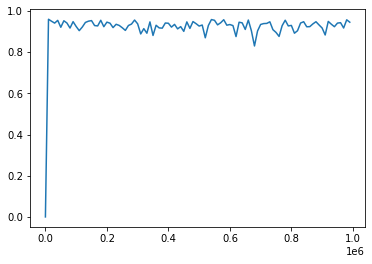

In [1940]:
#plotting accuracy vs lambda
l_SVM1 = [] #to store the values of the accuracy
m_SVM1 = [] #to store the values of the parameter lambda
for i in range(0,1000000,10000):
    lambda_val = i
    m_SVM1.append(lambda_val)
    l_SVM1.append(cross_validation_score_SVM(X_tumour_samples_SVM, y_tumour_samples_tr, folds_indexes_tumour_samples, lambda_val)) #calculating accuracy and appending it to l_knn1
plt.plot(m_SVM1,l_SVM1)

Now we plot for lambda in [0,20], and we get the following plot of average accuracies. We can notice how the accuracies are lower for small values of lambda

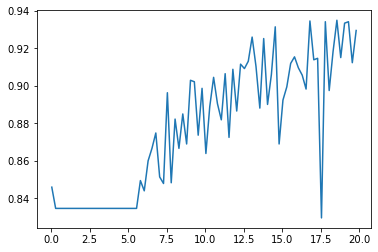

In [1948]:
#plotting accuracy vs lambda
l_SVM2 = [] #to store the values of the accuracy
m_SVM2 = [] #to store the values of the parameter lambda
for i in range(1,400,5):
    lambda_val = 0.05*i
    m_SVM2.append(lambda_val)
    l_SVM2.append(cross_validation_score_SVM(X_tumour_samples_SVM, y_tumour_samples_tr, folds_indexes_tumour_samples, lambda_val)) #calculating accuracy and appending it to l_knn1
plt.plot(m_SVM2,l_SVM2)

### 2.3.2

We define a function that counts the true/false positive and true false/negatives and gives as a result $FPR = \frac{FP}{TN+FP}$, and $TPR = \frac{TP}{TP+FN}$

In [2016]:
def score_SVM_CM(w, X, y):
    y_pred = np.sign(X @ w)
    N = len(y)
    TP = 0 #True positives
    TN = 0 #True negatives
    FP = 0 #False positives
    FN = 0 #False negatives
    for j in range(N):
        if y_pred[j] == y[j] and y_pred[j]== -1.0: 
            TN+=1
        elif y_pred[j] == y[j] and y_pred[j] == 1.0:
            TP+=1
        elif y_pred[j] != y[j] and y_pred[j] == 1.0:
            FP+=1
        elif y_pred[j] != y[j] and y_pred[j] == -1.0:
            FN+=1
    if (TP + FN) == 0 or (TN + FP) == 0:    #avoiding division by zero
        TPR = 'no'
        FPR = 'no'
    else:
        TPR = TP / (TP + FN) 
        FPR = FP / (TN + FP)
    return TPR, FPR

In [2006]:
list_TPR = []
list_FPR = []
lmhs_list = np.linspace(0.001,49999,320)
for i in range (319):
    w = sgd(X_tumour_samples_SVM, y_tumour_samples_tr, batch_size=32, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength = lmhs_list[i], print_outcome=False)
    TPR,FPR = score_SVM_CM(w, X_tumour_test_SVM, y_tumour_test_tr)
    if TPR != 'no' or FPR != 'no':
        list_TPR.append(TPR)
        list_FPR.append(FPR)


We get TPR and FPR we get for our optimal $\lambda$: (notice that we got our optimal parameters checking less possible lambdas than the ones we are using for the ROC)

In [2017]:
list_TPR_opt = []
list_FPR_opt = []
w_optimal = sgd(X_tumour_samples_SVM, y_tumour_samples_tr, batch_size=32, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength = 88.88888889, print_outcome=False)
TPR_opt,FPR_opt = score_SVM_CM(w_optimal, X_tumour_test_SVM, y_tumour_test_tr)
list_TPR_opt.append(TPR_opt)
list_FPR_opt.append(FPR_opt)

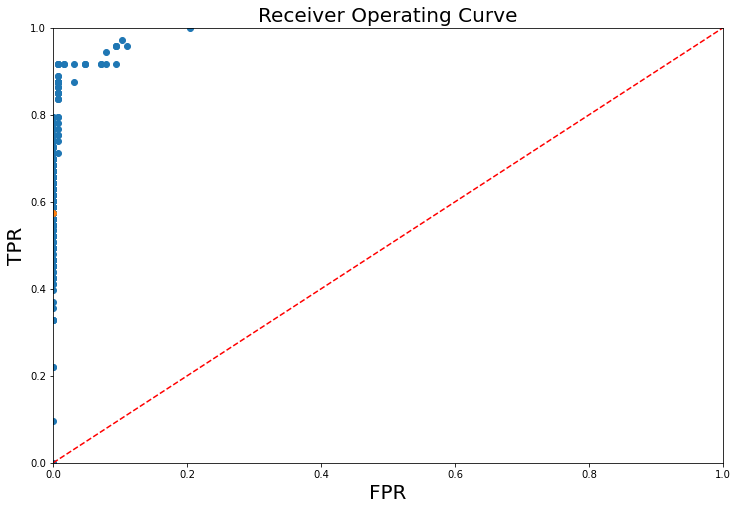

In [2051]:
plt.figure(figsize=(12,8))
plt.title(f"Receiver Operating Curve", size=20)
plt.scatter(list_FPR, list_TPR)
plt.scatter(list_FPR_opt, list_TPR_opt)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR', size=20)
plt.xlabel('FPR', size=20)
plt.show()

We can see that the 'scatter points' representing our ROC (I decided to scatter to have a better view) in blue.They are above the diagonal line, so the model is doing better than a random model. Furthermore our 'curve' goes near to the point (0,1), which is what we would like to see ideally.
The point we get for our optimal $\lambda$ is the one in orange, and how we can see it still is above the red line. We notice that maybe we could have optained something better but we computer our optimal lambda searching it in [0,100], while for the plot of ROC we used a larger set.

### 2.3.3

We import the data $\texttt{tumour_samples_bal.csv}$ with the balanced data set

In [2022]:
df_tumour_samples_bal = pd.read_csv("tumour_samples_bal.csv") #reading from thr csv file
df_tumour_samples_bal

,Unnamed: 0,n1_radius,n1_texture,n1_perimeter,n1_area,n1_smoothness,n1_compactness,n1_concavity,n1_concave_points,n1_symmetry,...,n3_texture,n3_perimeter,n3_area,n3_smoothness,n3_compactness,n3_concavity,n3_concave_points,n3_symmetry,n3_fractal_dimension,DIAGNOSIS
0,0,14.530395,20.421653,85.363155,675.768723,0.108968,0.160971,0.177338,0.076638,0.211611,...,31.530430,117.452224,995.295094,0.149985,0.361014,0.507859,0.194167,0.364020,0.108554,M
1,1,15.716418,11.961019,102.643405,676.233715,0.126132,0.156888,0.199903,0.109296,0.202276,...,17.016180,118.556593,1073.826428,0.156691,0.391081,0.612940,0.180875,0.302284,0.106598,M
2,2,21.137170,28.522843,123.110775,1350.096674,0.091688,0.105862,0.168914,0.076865,0.136646,...,36.202911,161.032929,1670.209793,0.114542,0.243286,0.404950,0.149961,0.274891,0.082890,M
3,3,20.985951,21.139095,123.856163,1214.287779,0.102580,0.117669,0.198974,0.098910,0.204487,...,28.726188,146.057844,1410.132241,0.120466,0.226293,0.363629,0.183632,0.252874,0.072986,M
4,4,22.136720,23.129660,137.379083,1304.114821,0.096771,0.147616,0.262871,0.129781,0.216392,...,26.846823,172.665832,1815.393844,0.124286,0.361435,0.677388,0.205779,0.311112,0.070464,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,12.586262,17.042080,84.933506,558.765229,0.091761,0.056785,0.043764,0.017047,0.201145,...,23.483917,86.850747,582.852909,0.122505,0.150139,0.162602,0.068105,0.366096,0.073594,B
796,796,11.803064,29.143953,79.909893,432.828557,0.082877,0.050179,0.013556,0.019917,0.185930,...,34.489916,88.370384,575.936260,0.097904,0.109149,0.037035,0.040736,0.228439,0.068118,B
797,797,9.133855,20.587504,61.884174,230.260769,0.105125,0.072745,0.018446,0.012392,0.172465,...,30.955895,65.333249,370.693374,0.158548,0.166818,0.062229,0.066901,0.292290,0.094359,B
798,798,14.604268,15.911254,95.571949,670.932144,0.093725,0.104808,0.084452,0.038038,0.193340,...,22.622737,111.460483,831.977088,0.125943,0.317772,0.433252,0.140478,0.299085,0.088326,B


In [2040]:
Tumour_samples_bal = df_tumour_samples_bal.to_numpy()
y_tumour_samples_bal = Tumour_samples_bal[:,31] # creating the array with the classifications (B or M)
N_tumour_samples_bal = len(y_tumour_samples_bal)
X_tumour_samples_bal = Tumour_samples_bal[:,1:31] #creating a matrix storing the input data
X_tumour_samples_bal.astype(float)


#We standardise
X_tumour_samples_bal = (X_tumour_samples_bal-np.mean(X_tumour_samples_bal))/np.std(X_tumour_samples_bal)

#We augment
X_tumour_samples_bal_SVM = np.hstack([X_tumour_samples_bal,1.0 * np.ones((len(y_tumour_samples_bal),1))])

#We transform y in +1,-1 from 'M' and 'B'
y_tumour_samples_bal_tr = transform_diagnosis(y_tumour_samples_bal)

#We create the 5 folds
folds_indexes_bal = np.split(np.arange(len(y_tumour_samples_bal)), 5)


We compute the best parameter $\lambda$  (using the cross validation function we defined before)

In [2041]:
def cross_validation_score_SVM_bal(X_train, y_train, folds,regul_strength):
    #performs 5 cross validation and returns the average accuracy
  scores = []
  for i in range(len(folds)):
    val_indexes = folds[i]
    train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))
    
    X_train_i = X_train[train_indexes, :]
    y_train_i = y_train[train_indexes]


    X_val_i = X_train[val_indexes, :] 
    y_val_i = y_train[val_indexes] 
    
    w = sgd(X_train_i, y_train_i, batch_size=32, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength = regul_strength, print_outcome=False)


    scoreSVM = score_SVM(w,X_val_i,y_val_i)
    scores.append(scoreSVM)

  # Return the average score
  return np.mean(scores) 

In [2042]:
def choose_best_lambda_SVM_bal(X_train, y_train, folds, lambda_range):   #This function is strongly inspired by the weekly notebooks of this module
  lambda_scores = np.zeros((len(lambda_range),))
  
  for i, lamb in enumerate(lambda_range):
    lambda_scores[i] = cross_validation_score_SVM_bal(X_train, y_train, folds, lamb)
    print(f'Hyperparameter lambda={lamb}: {lambda_scores[i]:f}')

  best_lambda_index = np.argmax(lambda_scores)
  return lambda_range[best_lambda_index]




In [2044]:
best_lambda_bal_SVM = choose_best_lambda_SVM_bal(X_tumour_samples_bal_SVM, y_tumour_samples_bal_tr, folds_indexes_bal, list_SVM_param)
print('best_lambda:', best_lambda_bal_SVM)

Hyperparameter lambda=1e-08: 0.342500
Hyperparameter lambda=1.01010102: 0.500000
Hyperparameter lambda=2.02020203: 0.498750
Hyperparameter lambda=3.03030304: 0.538750
Hyperparameter lambda=4.04040405: 0.251250
Hyperparameter lambda=5.05050506: 0.523750
Hyperparameter lambda=6.06060607: 0.842500
Hyperparameter lambda=7.070707080000001: 0.592500
Hyperparameter lambda=8.080808090000001: 0.681250
Hyperparameter lambda=9.090909100000001: 0.918750
Hyperparameter lambda=10.10101011: 0.927500
Hyperparameter lambda=11.111111120000002: 0.928750
Hyperparameter lambda=12.121212130000002: 0.931250
Hyperparameter lambda=13.131313140000001: 0.850000
Hyperparameter lambda=14.141414150000003: 0.911250
Hyperparameter lambda=15.151515160000002: 0.736250
Hyperparameter lambda=16.161616170000002: 0.940000
Hyperparameter lambda=17.17171718: 0.762500
Hyperparameter lambda=18.18181819: 0.952500
Hyperparameter lambda=19.1919192: 0.938750
Hyperparameter lambda=20.20202021: 0.870000
Hyperparameter lambda=21.2121

We can see how we get a different optimal parameter which is $\lambda = 18.18181819$

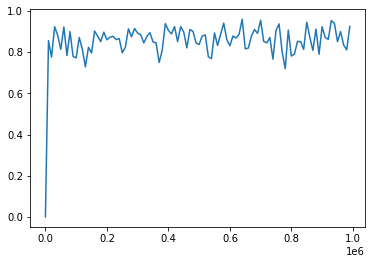

In [2045]:
#plotting accuracy vs lambda
l_SVM1_bal = [] #to store the values of the accuracy
m_SVM1_bal = [] #to store the values of the parameter lambda
for i in range(0,1000000,10000):
    lambda_val = i
    m_SVM1_bal.append(lambda_val)
    l_SVM1_bal.append(cross_validation_score_SVM_bal(X_tumour_samples_bal_SVM, y_tumour_samples_bal_tr, folds_indexes_bal, lambda_val)) #calculating accuracy and appending it to l_knn1
plt.plot(m_SVM1_bal,l_SVM1_bal)

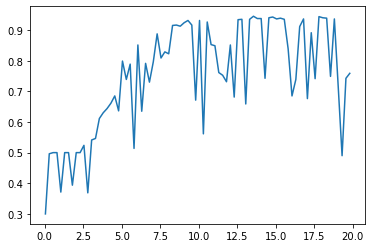

In [2046]:
#plotting accuracy vs lambda
l_SVM2_bal = [] #to store the values of the accuracy
m_SVM2_bal = [] #to store the values of the parameter lambda
for i in range(1,400,5):
    lambda_val = 0.05*i
    m_SVM2_bal.append(lambda_val)
    l_SVM2_bal.append(cross_validation_score_SVM_bal(X_tumour_samples_bal_SVM, y_tumour_samples_bal_tr, folds_indexes_bal, lambda_val)) #calculating accuracy and appending it to l_knn1
plt.plot(m_SVM2_bal,l_SVM2_bal)

Plotting (in [0,1000000], and zoomed in [0.05,20]) we can see a similar behaviour to the one we got in the previous exercise with unbalanced data, but there are oscillations noticeable on the 'larger set'. This is probably caused by the presence of less data( only 800 rows instead of 2566 as in the unbalanced data set)

In [2047]:
list_TPR_bal = []
list_FPR_bal = []
lmhs_list = np.linspace(0.001,49999,320)
for i in range (319):
    w = sgd(X_tumour_samples_bal_SVM, y_tumour_samples_bal_tr, batch_size=32, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength = lmhs_list[i], print_outcome=False)
    TPR,FPR = score_SVM_CM(w, X_tumour_test_SVM, y_tumour_test_tr)
    if TPR != 'no' or FPR != 'no':
        list_TPR_bal.append(TPR)
        list_FPR_bal.append(FPR)



In [2049]:
list_TPR_opt_bal = []
list_FPR_opt_bal = []
w_optimal = sgd(X_tumour_samples_bal_SVM, y_tumour_samples_bal_tr, batch_size=32, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength = 18.18181819, print_outcome=False)
TPR_opt,FPR_opt = score_SVM_CM(w_optimal, X_tumour_test_SVM, y_tumour_test_tr)
list_TPR_opt_bal.append(TPR_opt)
list_FPR_opt_bal.append(FPR_opt)

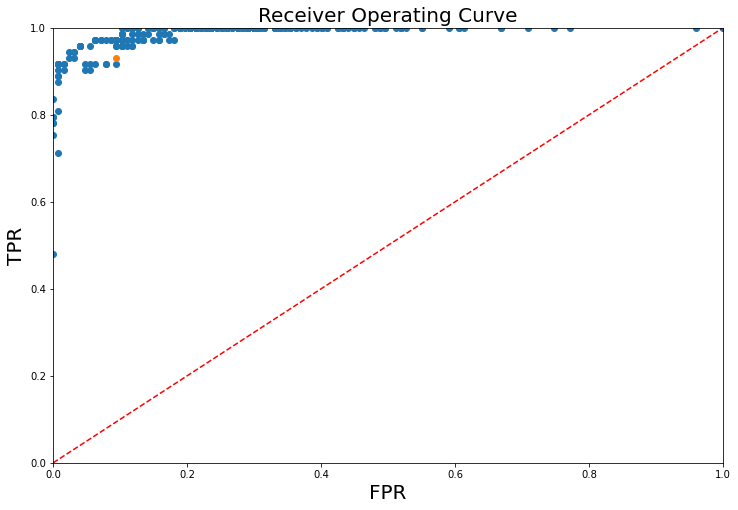

In [2052]:
plt.figure(figsize=(12,8))
plt.title(f"Receiver Operating Curve", size=20)
plt.scatter(list_FPR_bal, list_TPR_bal)
plt.scatter(list_FPR_opt_bal, list_TPR_opt_bal)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR', size=20)
plt.xlabel('FPR', size=20)
plt.show()

We can see that the 'scatter points' representing our ROC (I decided to scatter to have a better view) in blue.We can again notice how the ROC curve is above the red line, so the model is doing better than a random model. 

Furthermore our 'curve' (so the scatter point) goes near to the line $TPR=1$, which means than differently from what we got for the unbalanced training data we are less likely to get False negatives (We remember $FPR = \frac{FP}{TN+FP}$, and $TPR = \frac{TP}{TP+FN}$). If we think about this problem in a real life context we can say that is better to diagnose false positives than false negatives, since in case of a false positive a patience could proceed with further diagnosis, while on the opposite a false negative patient could underestimate the problem.


The point we get for our optimal $\lambda$ is the one in orange, and how we can see it still is above the red line. Morevoer it seems to be a better result than the one we got in the previous exercise.

We notice that maybe we could have optained something better for the optimal lambda but we compute our optimal lambda searching it in [0,100], while for the plot of ROC we used a larger set.

Finally is important to notice that the balanced data is composed by roughly less than a third of the data (rows) (800 rows against 2566), but still provides a really good model.

<a name="task-3"></a>

# Task 3: Mastery Component [^](#outline)

<a name="q31"></a>

## 3.1: Logistic regression and bagging [^](#outline)

### 3.1.1

First of all we import the data and initialise everything (standardising when necessary)

In [14]:
#Training
Tumour_samples = df_tumour_samples.to_numpy()
np.random.shuffle(Tumour_samples)  #Shuffling
y_tumour_samples = Tumour_samples[:,31] # creating the array with the classifications (B or M)
N_tumour_samples = len(y_tumour_samples)
X_tumour_samples = Tumour_samples[:,1:31] #creating a matrix storing the input data


#We standardise
X_tumour_samples = (X_tumour_samples-np.mean(X_tumour_samples))/np.std(X_tumour_samples)
X_tumour_samples_lg=(X_tumour_samples.T).astype(float)

#Testing
Tumour_test = df_tumour_test.to_numpy()
np.random.shuffle(Tumour_test)  #Shuffling
y_tumour_test = Tumour_test[:,31] # creating the array with the classifications (B or M)
N_tumour_test = len(y_tumour_test)
X_tumour_test = Tumour_test[:,1:31] #creating a matrix storing the input data


#We standardise
X_tumour_test = (X_tumour_test-np.mean(X_tumour_test))/np.std(X_tumour_test)
X_tumour_test_lg=(X_tumour_test.T).astype(float)



In [15]:
df_tumour_samples

,Unnamed: 0,n1_radius,n1_texture,n1_perimeter,n1_area,n1_smoothness,n1_compactness,n1_concavity,n1_concave_points,n1_symmetry,...,n3_texture,n3_perimeter,n3_area,n3_smoothness,n3_compactness,n3_concavity,n3_concave_points,n3_symmetry,n3_fractal_dimension,DIAGNOSIS
0,0,10.855170,15.248290,69.167041,359.534878,0.105488,0.080200,0.066410,0.034194,0.182796,...,18.984557,81.443134,466.879302,0.149080,0.200185,0.205695,0.111592,0.335999,0.093477,B
1,1,10.068958,15.532758,66.130635,330.040665,0.099813,0.109540,0.057583,0.023322,0.195650,...,22.840293,82.133171,473.367822,0.125478,0.330466,0.283304,0.088021,0.312882,0.096158,B
2,2,12.271409,18.100314,78.195610,421.537832,0.105147,0.095315,0.043317,0.031539,0.188801,...,26.365608,84.598334,620.586067,0.146766,0.118707,0.147900,0.050402,0.291805,0.069556,B
3,3,10.531733,18.452486,67.227069,340.063033,0.086041,0.049961,0.049709,0.011046,0.203093,...,24.385385,73.296855,429.675600,0.100060,0.143683,0.177225,0.028111,0.287749,0.073174,B
4,4,12.367686,14.399191,80.643814,460.849710,0.106410,0.101420,0.020806,0.021990,0.195326,...,19.614305,89.910502,472.323112,0.138135,0.276127,0.151098,0.074396,0.345258,0.095830,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,2561,14.383173,19.454910,100.495126,637.413375,0.076174,0.224136,0.305786,0.073760,0.168884,...,23.016513,108.867289,731.638144,0.079317,0.410666,0.674672,0.146962,0.241495,0.106978,B
2562,2562,10.018359,18.661516,61.848450,291.512307,0.083671,0.048121,0.028997,0.007389,0.164375,...,24.919767,67.920361,374.629250,0.129882,0.081497,0.109356,0.028243,0.252432,0.081462,B
2563,2563,11.168036,12.651203,67.102303,376.640056,0.096154,0.050181,0.017739,0.022895,0.183905,...,17.412221,73.221040,421.681446,0.135757,0.089036,0.070456,0.039851,0.295527,0.070584,B
2564,2564,11.719646,18.933783,78.556817,426.631397,0.113492,0.091756,0.070046,0.039025,0.203736,...,26.677691,86.572055,539.508865,0.132254,0.194688,0.179610,0.071053,0.330223,0.079510,B


We introduce a function that transforms the diagnosis result from 'B' and 'M' to 1 and 0

In [16]:
def transform_diagnosis_lg(y):
    #taked a vector of diagnosis and return a vector long the same containing +1 instead of 'M' and 0 instead of 'B'
    N = len(y)
    y_tr = np.zeros(N)
    for i in range(N):
        if y[i] == 'M':
            y_tr[i]+=1
        elif y[i] == 'B':
            y_tr[i]+=0
    return y_tr

In [17]:
#transforming the diagnosis from 'M's and 'B's to +-1

y_tumour_samples_tr = transform_diagnosis_lg(y_tumour_samples).astype(int)
y_tumour_test_tr = transform_diagnosis_lg(y_tumour_test).astype(int)

We are going to use logistic regression to classificate. In particular we will compute the probabulity that a certain 'sample/diagnosis/element' is =1  ( we will do that using: 
$$
P(y=1) = \frac{1}{1 + e^{-\beta^T  x \ + \beta_0}}
$$
where $ \beta$, $\beta_0$  are parameters that we will find  minimising the cost/loss function), and we will use a threshold $=0.5$. This means that if the probability that we calculated is $\le 0.5$, then we assign 0, otherwise we predict 1.

In [19]:
def logistic(x):                 #logistic function
    return 1. / (1. + np.exp(-x))


def predict_log(X, beta, beta_0):
    y_log = logistic(X.T @ beta + beta_0)  
    return y_log.squeeze()


def initialise(d):
    """    
    Argument:
    d: size of the beta vector (or number of parameters)
  
    Returns:
    beta: initialised vector of shape (d, 1)
    beta_0: initialised scalar (corresponds to the offset)
    """
  
    beta = np.zeros(shape=(d, 1), dtype=np.float32)
    beta_0 = 0
  
    assert(beta.shape==(d, 1))
    assert(isinstance(beta_0, float) or isinstance(beta_0, int))
  
    return beta, beta_0

In [20]:
def propagate(X, y, beta, beta_0):
    """
  Arguments:
  X: data of size (d, n)
  y: true label vector of size (1, n)
  beta: parameters, a numpy array of size (d, 1)
  beta_0: offset, a scalar

  Returns:
  cost: negative log-likelihood cost for logistic regression
  dbeta: gradient of the loss with respect to beta
  dbeta_0: gradient of the loss with respect to beta_0
    """
    n = X.shape[1]
    y_log = predict_log(X, beta, beta_0)

    # cost function
    cost = - (y * np.log(y_log) + (1-y) * np.log(1 - y_log)).mean()

    # derivatives
    dbeta = (X * (y_log - y)).mean(axis=1).reshape(-1, 1) 
    dbeta_0 =  (y_log - y).mean() 

    assert(dbeta.shape==beta.shape)
    assert(dbeta_0.dtype==float)
    cost = np.squeeze(cost)
    assert(cost.shape==())
  
    # store gradients in a dictionary
    grads = {"dbeta": dbeta, "dbeta_0": dbeta_0}
    
    return grads, cost

We want to minimize the cost function $$
\mathcal L = - \frac{1}{n} \sum_{i=1}^n y^{(i)} \log(\hat{y}_{\text{log}}^{(i)}) + (1-y^{(i)}) \log (1-\hat{y}_{\text{log}}^{(i)}) \, .
$$
So in this way we will use gradiend descend to find the optimal values of $\beta$ and $\beta_0$. In particular we will use 5000 iterations and a learning rate of 0.005.

In [21]:
def optimise(X, y, beta, beta_0, num_iterations=5000, learning_rate=0.005, print_cost=False):
    """
  Arguments:
  X: data of size (d, n)
  y: true label vector of size (1, n)
  beta: parameters, a numpy array of size (d, 1)
  beta_0: offset, a scalar
  num_iterations: number of iterations gradient descent shall update the parameters
  learning_rate: step size in updating procedure
  print_cost: whether to print the cost every 100 iterations or not

  Returns:
  params: dictionary containing the parameters beta and offset beta_0
  grads: dictionary containing the gradients
  costs: list of all the costs computed during the optimisation (can be used to plot the learning curve).
  """
    costs = []
    
    for i in range(num_iterations):

        # calculate cost and gradients using the function 'propagate'
        grads, cost = propagate(X, y, beta, beta_0)
      
        # retrieve derivatives from grads dictionary
        dbeta = grads["dbeta"]
        dbeta_0 = grads["dbeta_0"]

        # update parameters
        beta = beta -learning_rate*dbeta
        beta_0 = beta_0 - learning_rate*dbeta_0

        # record the costs
        if i % 100 == 0:
            costs.append(cost)

        # print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print ("cost after iteration %i: %f" %(i, cost))
  
    # save parameters and the gradients in dictionaries
    params = {"beta": beta, "beta_0": beta_0}
    grads = {"dbeta": dbeta, "dbeta_0": dbeta_0}
  
    return params, grads, costs

The following function is the one used to predict. Notice that we use $\texttt{.round()}$, instead of the threshold comparison, since the threshold is 0.5, and so these two things are equivalent. In fact $\texttt{.round()}$ assigns 1 for values $>0.5$ and $0$ otherwise

In [22]:
def predict(X_test, beta, beta_0, return_y_log = False):
  """
  Arguments:
  X_test: test data of size (d, n)
  beta: parameters, a numpy array of size (d, 1)
  beta_0: offset, a scalar

  Returns:
  y_pred: vector containing all binary predictions (0/1) for the examples in X_test
  """
  n = X_test.shape[1]
  y_pred = np.zeros((1,n))
  beta = beta.reshape(X_test.shape[0], 1)
  
  # compute vector y_log predicting the probabilities
  y_log = predict_log(X_test, beta, beta_0)
  
  y_pred = y_log.round().reshape(1, -1) 
  
  assert(y_pred.shape==(1, n))
  
  if return_y_log == False:
    return y_pred
  else:
        return y_pred, y_log

This is our final function. In it we define also the accuracy cost, which relies basically on the number of accurate predictions.

In [23]:
def model(X_train, y_train, X_test, y_test, num_iterations=5000, learning_rate=0.005, print_cost=False):
  # initialize parameters with zeros
  beta, beta_0 = initialise(X_train.shape[0])

  # gradient descent
  parameters, grads, costs = optimise(X_train, y_train, beta, beta_0, num_iterations, learning_rate, print_cost=print_cost)

  # retrieve parameters beta and beta_0 from dictionary "parameters"
  beta = parameters["beta"]
  beta_0 = parameters["beta_0"]

  # predict test and train set examples
  y_pred_test = predict(X_test, beta, beta_0)
  y_pred_train = predict(X_train, beta, beta_0)

  # print train/test Errors
  print("train accuracy: {} %".format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

  # saving all information
  d = {"costs": costs, "y_pred_test": y_pred_test, "y_pred_train": y_pred_train, "beta": beta, "beta_0": beta_0, "learning_rate": learning_rate, "num_iterations": num_iterations}
  
  return d

Finally we apply the logistic regression to our problem and get the following accuracies

In [24]:
d = model(X_tumour_samples_lg, y_tumour_samples_tr, X_tumour_test_lg,y_tumour_test_tr, num_iterations=5000, learning_rate=0.005, print_cost=False)

train accuracy: 94.1153546375682 %
test accuracy: 82.5 %


### 3.1.2

In [25]:
from numpy import random
import numpy as np

We want to apply bagging to the logistic regression classifier. So we will take $R$ random samples with $N'<N$ elements from the data set. We will apply logistic regression to all of them, obtaining so R probability vectors. We average them all and at the end compare the average vector with the threshold.

First of all we modify our function 'model' defined in the previous exercise 3.1.1. This function train the logistic model and returns the probability vector for the testing samples. (So a probability vector which gives for each element in the testing sample the probability of being diagnosed 'M')

In [26]:
def model_modified(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=0.005, print_cost=False):
    
  """This function returns the 'not rounded prediction', so before the comparison with the threshold"""
  # initialize parameters with zeros
  beta, beta_0 = initialise(X_train.shape[0])

  # gradient descent
  parameters, grads, costs = optimise(X_train, y_train, beta, beta_0, num_iterations, learning_rate, print_cost=print_cost)

  # retrieve parameters beta and beta_0 from dictionary "parameters"
  beta = parameters["beta"]
  beta_0 = parameters["beta_0"]

  # predict test and train set examples
  y_pred_test, y_log_test = predict(X_test, beta, beta_0,return_y_log = True )
  y_pred_train = predict(X_train, beta, beta_0)
  
  return y_log_test

The following function applies bagging, generating R random sample (with 500 elements taken from the training dataset), trains the logistic model with all of them, calculates the average probability vector for the prediction and compares with a threshold equal to 0.5 (using the function $\texttt{round()}$. Finally it calculates the accuracy on the testing dataset given as an input.
This function relies in part to the functions given in the previous exercise and works with 5000 iterations and a learning rate of 0.005

In [81]:
def bagging_logistic(R, X_train, y_train, X_test, y_test, num_iterations=5000, learning_rate=0.005, print_cost=False):
    """R: number of samples we will use for bagging
    The other inputs are the same of the previous function
    
    Output: the average accuracy"""
    
    # I initialize my prediction vector for the testing set
    y_pred = np.zeros(len(y_test))
    
    N = X_train.shape[1] #it's going to me the max bound in random.randint
    
    # I start a loop long R, where R is the number of the samples I am considering
    for j in range (R):
        k_j = random.randint(0,N,500)    #I choose the indexes in order to collect random samples
        
        # I calculate y_log using logistic regression (I don't use the threshold yet to obtain the final prediction)
        y_log_test = model_modified(X_train[:,k_j], y_train[k_j], X_test, y_test, num_iterations=5000, learning_rate=0.005, print_cost=False)
        
        #I add my resulting array to the prediction array
        y_pred += y_log_test
    #I calculate the average
    y_pred = y_pred/R     #This is the average vector I get using logistic regression on R random samples
    
    #NOw I use a threshold equal to 0.5 (I can do that just rounding the element of my vector, such that if they are <=0.5, they are rounded to 0 and viceversa they are rounded to 1 when ther are >0.5)
    
    y_pred = y_pred.round().reshape(1, -1)
    
    #Now I can calculate the accuracy on the testing set
    test_accuracy = 100 - np.mean(np.abs(y_pred - y_test)) * 100
    
    return  test_accuracy

We define the folds

In [85]:
folds_indexes_tumour_samples = np.split(np.arange(len(y_tumour_samples)-1), 5)

We finally implement 5 folds cross validation (as in the previous results)

In [86]:
def cross_validation_score_logistic_bagging(X_train, y_train, folds,number_of_samples):
    #performs 5 cross validation and returns the average accuracy
  scores = []
  for i in range(len(folds)):
    val_indexes = folds[i]
    train_indexes = list(set(range(y_train.shape[0]-1)) - set(val_indexes))
    
    X_train_i = X_train[train_indexes, :]
    y_train_i = y_train[train_indexes]


    X_val_i = X_train[val_indexes, :] 
    y_val_i = y_train[val_indexes] 
    
    score_lb = bagging_logistic(number_of_samples,X_train_i.T, y_train_i, X_val_i.T,y_val_i, num_iterations=5000, learning_rate=0.005, print_cost=False)

    scores.append(score_lb)

  # Return the average score
  return np.mean(scores)

In [87]:
def choose_best_number_log_bg(X_train, y_train, folds, numb_range):   #This function is strongly inspired by the weekly notebooks of this module
  numb_scores = np.zeros((len(numb_range),))
  
  for i, numb in enumerate(numb_range):
    numb_scores[i] = cross_validation_score_logistic_bagging(X_train, y_train, folds, numb)  #numb is the number of samples
    print(f'Hyperparameter number of samples={numb}: {numb_scores[i]:f}')

  best_numb_index = np.argmax(numb_scores)  #I choose the one with greater accusacy
  return numb_range[best_numb_index]




We take the following numbers of sets to use in the cross validation. Being the research of an hyperparameter a never ending research and being this algorithm quite slow we will limite ourselves to only 6 possible parameters.

In [88]:
numb_range = np.arange(8,50,7)
numb_range

array([ 8, 15, 22, 29, 36, 43])

In [89]:
best_numb = choose_best_number_log_bg(X_tumour_samples.astype(float), y_tumour_samples_tr, folds_indexes_tumour_samples, numb_range)
print('best number of samples:', best_numb)



Hyperparameter number of samples=8: 94.074074
Hyperparameter number of samples=15: 94.152047
Hyperparameter number of samples=22: 94.113060
Hyperparameter number of samples=29: 94.152047
Hyperparameter number of samples=36: 94.113060
Hyperparameter number of samples=43: 94.074074
best number of samples: 15


We can see that our optimal parameter is 15, so the number of samples we will use for the bagging is 15.

### 3.1.3

The function $\texttt{bagging_logistic}$ returns the accuracy (we still use 0.5 as a threshold)

In [109]:
precision_15_ = bagging_logistic(15, X_tumour_samples_lg, y_tumour_samples_tr, X_tumour_test_lg, y_tumour_test_tr, num_iterations=5000, learning_rate=0.005, print_cost=False)
precision_15_



83.5

Our final accuracy on the testing data set is $83.5\%$, which is slightly better than the one we got with the logistic regression without bagging. However we don't see an heavy improvement, which doesn't give us any reason to use bagging with logistic regression (which is slower and has higher computational costs) instead of classic logistic regression. 

(I may guess (but I am not sure about this ) that this may be the reason bagging is more common with decision trees rather than with logistic regression.

We conclude with some little comments:
1. We choose as cardinality N' of the random sub samples 500, but we could take different N' and do a research for the optimal N' parameter.
2. The component of randomness in the choice of the elements of each sample could lead to slightly different results in the accuracy, but they can ignored.

<a name="q32"></a>

## 3.2 [^](#outline)

We want to minimize 

$min_{w_z}||w_z||^2+\frac{\lambda}{n}\sum_i max\{0,1-(z^{(i)}\cdot w_z+b)y^{(i)}$. We take the kernel $k(x,y)=e^{-\frac{||x-y||^2}{\sigma}}$. So $||w_z||^2 = w_z\cdot w_x = k(w,w) = 1$, which means that we can just focus on minimizing $\sum_i max\{0,1-(z^{(i)}\cdot w_z+b)y^{(i)}=\sum_i max\{0,1-(k(x^{(i)},w)+b)y^{(i)}$

We import the data

In [189]:
#Training set
Tumour_samples = df_tumour_samples.to_numpy()
y_tumour_samples = Tumour_samples[:,31] # creating the array with the classifications (B or M)
N_tumour_samples = len(y_tumour_samples)
X_tumour_samples = Tumour_samples[:,1:31] #creating a matrix storing the input data


#We standardise
X_tumour_samples_3 = (X_tumour_samples-np.mean(X_tumour_samples))/np.std(X_tumour_samples)

#We augment
X_tumour_samples_kern = np.hstack([X_tumour_samples_3,1.0 * np.ones((len(y_tumour_samples),1))])

#Testing set
Tumour_test = df_tumour_test.to_numpy()
y_tumour_test = Tumour_test[:,31] # creating the array with the classifications (B or M)
N_tumour_test = len(y_tumour_test)
X_tumour_test = Tumour_test[:,1:31] #creating a matrix storing the input data


#We standardise
X_tumour_test_3 = (X_tumour_test-np.mean(X_tumour_test))/np.std(X_tumour_test)


#We augment
X_tumour_test_kern = np.hstack([X_tumour_test_3,1.0 * np.ones((len(y_tumour_test),1))])




We write the cost function

In [452]:
def compute_cost_kern(w,sigma, X, y):
    n = X.shape[0]
    distances = []
    for i in range(n):
        distance = 1 - y[i]*(np.exp(-np.linalg.norm(X[i,:]-w)**2/sigma))
        if distance <0:
            distances.append(0)
        else:
            distances.append(distance)
    hinge = np.sum(distances)   #the sum is our new cost function

    # calculate cost
    return hinge



We write the gradient of the cost function

In [459]:
def calculate_cost_gradient_kern(w, X_batch, y_batch, sigma):
    # if only one example is passed
    if type(y_batch) == np.float64:
        y_batch = np.asarray([y_batch])
        X_batch = np.asarray([X_batch])  # gives multidimensional array
    
    dw = np.zeros(len(w), dtype = float)
    for i in range (X_batch.shape[0]):
        if max(0, 1 - y_batch[i]*(np.exp(-np.linalg.norm(X_batch[i,:]-w)**2/sigma)))==0:
            dw += 0
        else:
            for j in range(len(w)):
                dw[j] +=  -(2*y_batch[i] *(np.exp(-np.linalg.norm(X_batch[i,:]-w)**2/sigma))*((X_batch[i,j]-w[j])))/sigma
    return dw

In [460]:
def sgd_kern(X, y,sigma, batch_size=16, max_iterations=50000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=1e5, print_outcome=False):
    # initialise zero weights
    weights = np.zeros(X.shape[1])
    nth = 0
    # initialise starting cost as infinity
    prev_cost = np.inf
    
    # stochastic gradient descent
    indices = np.arange(len(y))
    for iteration in range(1, max_iterations):
        # shuffle to prevent repeating update cycles
        np.random.shuffle(indices)
        batch_idx = indices[:batch_size]
        X_b, y_b = X[batch_idx], y[batch_idx]
        for xi, yi in zip(X_b, y_b):
            ascent = calculate_cost_gradient_kern(weights, xi, yi, sigma) 
            weights = weights - (learning_rate * ascent)

        # convergence check on 2^n'th iteration
        if iteration==2**nth or iteration==max_iterations-1:
            # compute cost
            cost = compute_cost_kern(weights,sigma, X, y)
            if print_outcome:
                print("Iteration is: {}, Cost is: {}".format(iteration, cost))
            # stop criterion
            
              
            prev_cost = cost
            nth += 1
    
    return weights



In [461]:

def transform_diagnosis_kern(y):
    #taked a vector of diagnosis and return a vector long the same containing +1 instead of 'M' and -1 instead of 'B'
    N = len(y)
    y_tr = np.zeros(N)
    for i in range(N):
        if y[i] == 'M':
            y_tr[i]+=1.0
        elif y[i] == 'B':
            y_tr[i]-=1.0
    return y_tr



def score_kern(w, X, y):
    y_preds = np.sign(X @ w)
    return np.mean(y_preds == y)

In [462]:
y_tumour_samples_kern = transform_diagnosis_kern( y_tumour_samples)
y_tumour_test_kern = transform_diagnosis_kern( y_tumour_test)



In [463]:
w_kern = sgd_kern(X_tumour_samples_kern, y_tumour_samples_kern,1, 200, 10000, 0.001, 1e-5, regul_strength=2, print_outcome=True)

Iteration is: 1, Cost is: 2567.171158292329
Iteration is: 2, Cost is: 2567.1711307279625
Iteration is: 4, Cost is: 2567.1710978952906
Iteration is: 8, Cost is: 2567.1710287898754
Iteration is: 16, Cost is: 2567.1708604713986
Iteration is: 32, Cost is: 2567.1705358441486
Iteration is: 64, Cost is: 2567.1699341389067
Iteration is: 128, Cost is: 2567.168639255805
Iteration is: 256, Cost is: 2567.166096412904
Iteration is: 512, Cost is: 2567.1609034436233
Iteration is: 1024, Cost is: 2567.15067108759
Iteration is: 2048, Cost is: 2567.130920674679
Iteration is: 4096, Cost is: 2567.092852220184
Iteration is: 8192, Cost is: 2567.0231354624966
Iteration is: 9999, Cost is: 2566.994671307575


In [464]:
print(w_kern)

[ 0.00395797  0.00304685 -0.0001982  -0.01438712  0.00473178  0.00473287
  0.00473664  0.00473964  0.00472336  0.00473407  0.00471475  0.00460263
  0.00456057  0.00337331  0.00473974  0.00473825  0.00473761  0.00474008
  0.00473828  0.0047403   0.0038742   0.00256184 -0.00080267 -0.01873447
  0.0047278   0.0047246   0.0047267   0.00473716  0.00471415  0.00473218
 -0.0169119 ]


In [465]:
score_kern(w_kern, X_tumour_samples_kern, y_tumour_samples_kern)

0.8347622759158223

In [466]:
score_kern(w_kern, X_tumour_test_kern, y_tumour_test_kern)

0.635

This exercise has not been finished, but the way to proceed is just to implement cross validation as in the previous exercises, to find the optimal parameter $\sigma$.